# SLD4 - Ashley Chen
# **Digital Marketing Campaign Analysis for AMC Theaters**

### **Import Libraries & Load Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  roc_curve, f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


In [ ]:
#read dataset
df = pd.read_csv('digital_marketing_campaign_dataset.csv')

In [ ]:
df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

In [ ]:
#Remove the columns that do not have data to use in analysis
#column values = 'IsConfid'
df = df.drop(['AdvertisingPlatform',	'AdvertisingTool'], axis=1)

In [ ]:
df.dtypes

CustomerID             int64
Age                    int64
Gender                object
Income                 int64
CampaignChannel       object
CampaignType          object
AdSpend              float64
ClickThroughRate     float64
ConversionRate       float64
WebsiteVisits          int64
PagesPerVisit        float64
TimeOnSite           float64
SocialShares           int64
EmailOpens             int64
EmailClicks            int64
PreviousPurchases      int64
LoyaltyPoints          int64
Conversion             int64
dtype: object

In [ ]:
#summary of numeric data
df.describe()

CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.302479     4.068340   
50%          0.104046      25.000000       5.534257     7.682956   
75%          0.152077      37.000000       7.835756    11.481468   
max          0.199995      49.000000       9.999055    14.995311   

       SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count   8000.000000  8000.000000  8000.000000        8000.000000   
mean      49.799750     9.476875     4.467375           4.485500   
std       28.901165     5.711111     2.856564           2.888093   
min        0.000000     0.000000     0.000000           0.000000   
25%       25.000000     5.000000     2.000000           2.000000   
50%       50.000000     9.000000     4.000000           4.000000   
75%       75.000000    14.000000     7.000000           7.000000   
max       99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    8000.000000  8000.000000  
mean     2490.268500     0.876500  
std      1429.527162     0.329031  
min         0.000000     0.000000  
25%      1254.750000     1.000000  
50%      2497.000000     1.000000  
75%      3702.250000     1.000000  
max      4999.000000     1.000000

In [ ]:
# number of returning customers who visit the website
returning_visitors = len(df[df['WebsiteVisits'] > 1])
print(f"Number of Returning Visitors: {returning_visitors}")

Number of Returning Visitors: 7700


In [ ]:
# number of customer who have made more than one purchased
repeat_purchase_count = len(df[df['PreviousPurchases'] > 1])
print(f"Number of Repeat Purchases: {repeat_purchase_count}")

Number of Repeat Purchases: 6368


In [ ]:
#summary of categorical data
df.describe(include='object')

Gender CampaignChannel CampaignType
count     8000            8000         8000
unique       2               5            4
top     Female        Referral   Conversion
freq      4839            1719         2077

In [ ]:
#Check for missing values
missing_values = df.isnull().sum()
missing_values

CustomerID           0
Age                  0
Gender               0
Income               0
CampaignChannel      0
CampaignType         0
AdSpend              0
ClickThroughRate     0
ConversionRate       0
WebsiteVisits        0
PagesPerVisit        0
TimeOnSite           0
SocialShares         0
EmailOpens           0
EmailClicks          0
PreviousPurchases    0
LoyaltyPoints        0
Conversion           0
dtype: int64

# **Demographic Distribution**

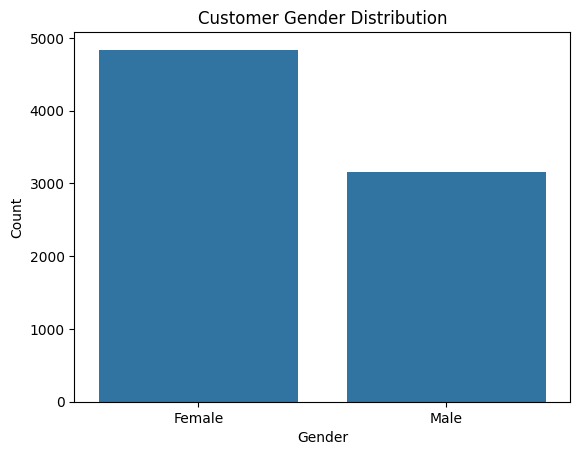

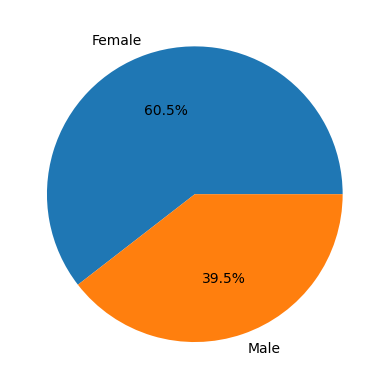

In [ ]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Customer Gender Distribution")
plt.show()

df.Gender.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.show()

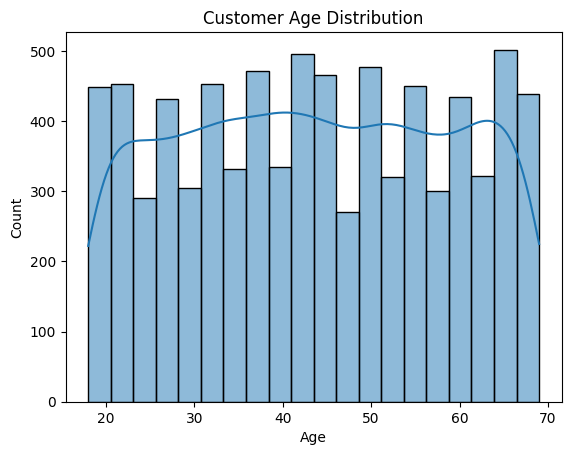

In [ ]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")
plt.show()


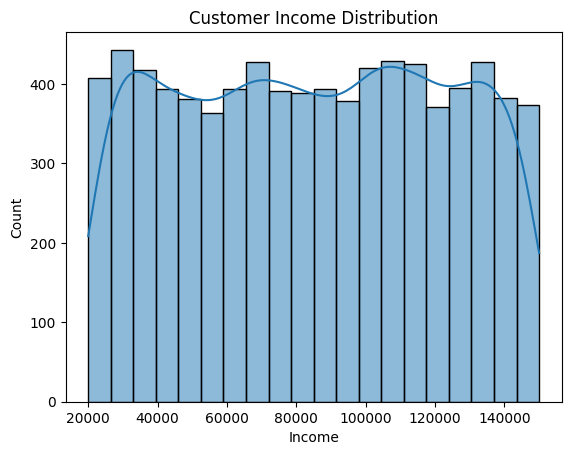

In [ ]:
# Income distribution
sns.histplot(df['Income'], bins=20, kde=True)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Customer Income Distribution")
plt.show()

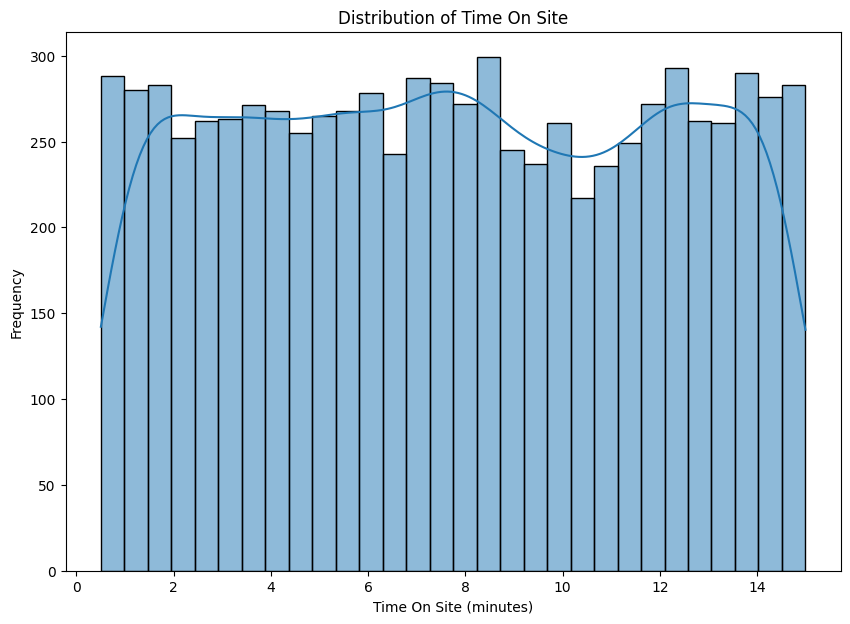

In [ ]:
#Time one Site Distribution
plt.figure(figsize=(10, 7))
sns.histplot(df['TimeOnSite'], bins=30, kde=True)
plt.title('Distribution of Time On Site')
plt.xlabel('Time On Site (minutes)')
plt.ylabel('Frequency')
plt.show()

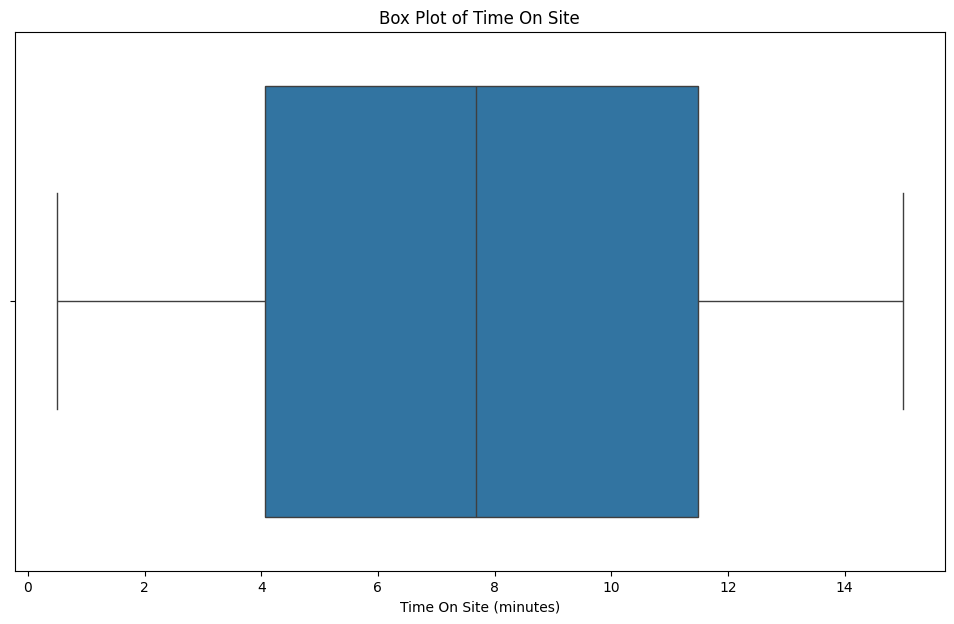

In [ ]:
#box plot of time on site
plt.figure(figsize=(12, 7))
sns.boxplot(x=df['TimeOnSite'])
plt.title('Box Plot of Time On Site')
plt.xlabel('Time On Site (minutes)')
plt.show()

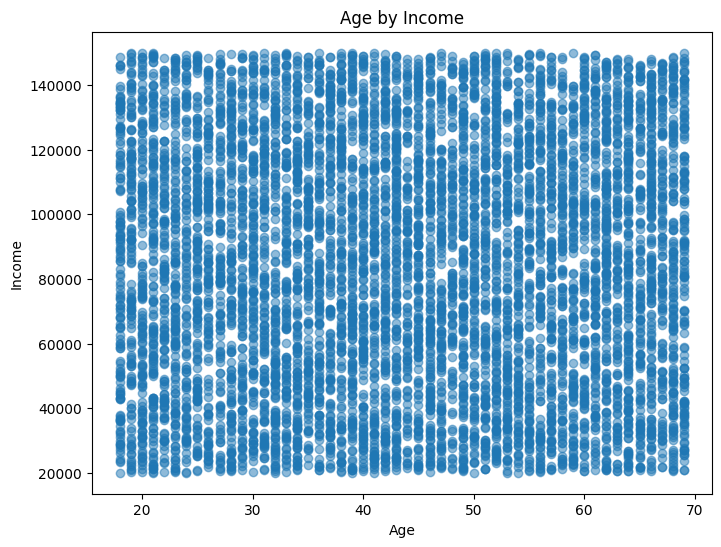

In [ ]:
#Distribution of age by income
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'],df['Income'], alpha=0.5)
plt.title('Age by Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
#Count of Campaign Types
df['CampaignType'].value_counts()


CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

In [ ]:
#Distribution of campaign channel and campaign type
df_campaign = pd.crosstab(df['CampaignChannel'], df['CampaignType'])
df_campaign

CampaignType     Awareness  Consideration  Conversion  Retention
CampaignChannel                                                 
Email                  378            403         416        360
PPC                    412            404         447        392
Referral               431            407         445        436
SEO                    390            369         402        389
Social Media           377            405         367        370

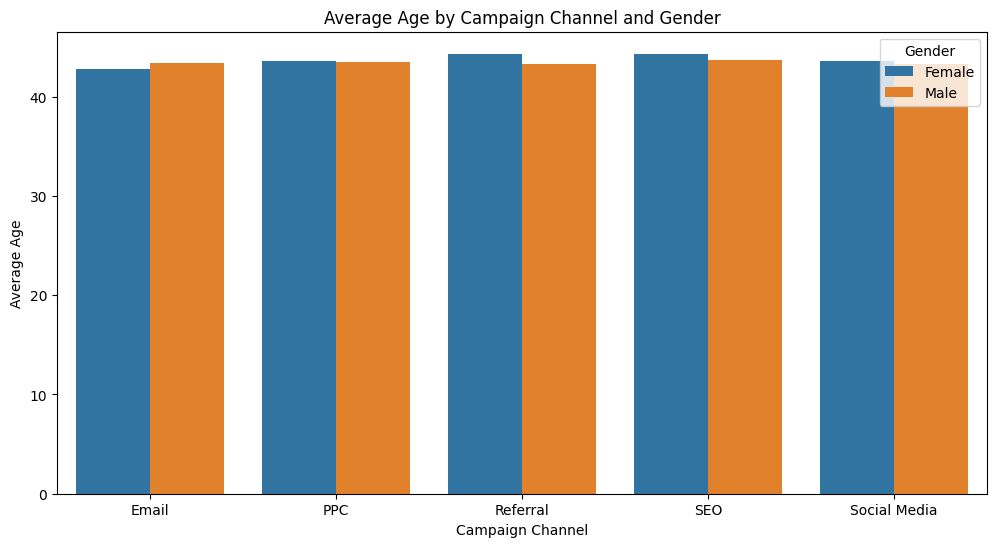

In [ ]:
#Average Age and Gender by Campaign Channel
mean_age = df.groupby(['CampaignChannel', 'Gender'])['Age'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(x='CampaignChannel', y='Age', hue='Gender', data=mean_age)

plt.xlabel("Campaign Channel")
plt.ylabel("Average Age")
plt.title("Average Age by Campaign Channel and Gender")
plt.legend(title="Gender")

plt.show()

# **Statistical Analysis**

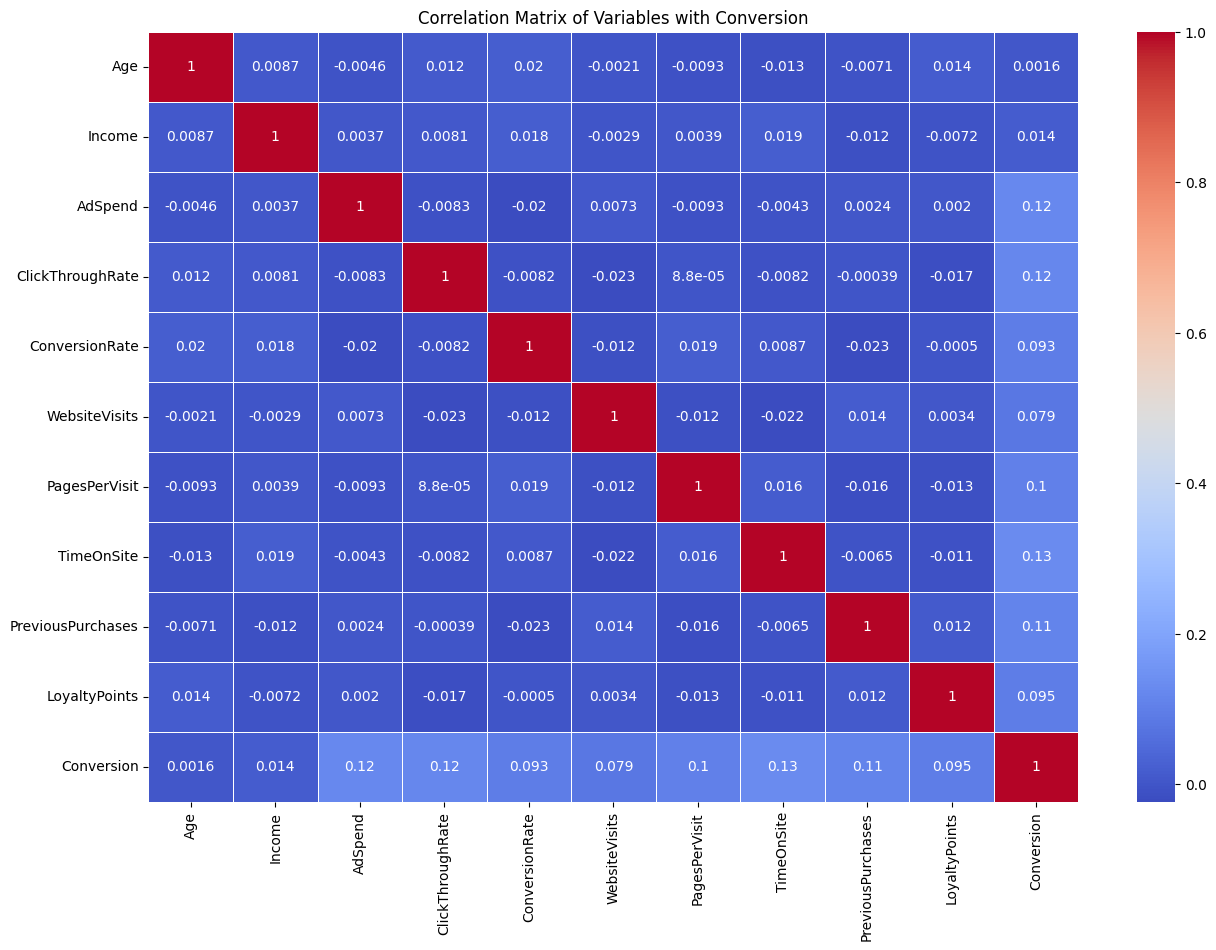

In [ ]:
#Correlation Matrix of numeric variables
plt.figure(figsize=(15, 10))
corr_matrix = df[['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints','Conversion']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Variables with Conversion')
plt.show()


Overall Conversion Rates by Gender:
Gender
Female    0.876214
Male      0.876938
Name: Conversion, dtype: float64


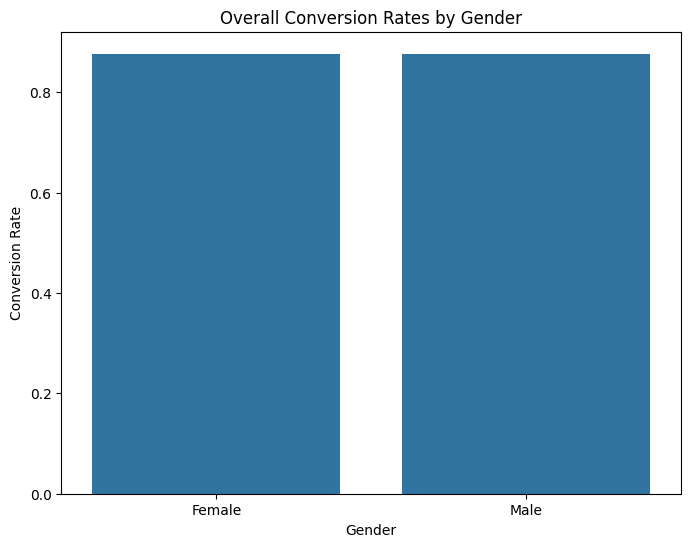

In [ ]:
# Overall conversion rates by gender
gender_conversion = df.groupby('Gender')['Conversion'].mean()
print("\nOverall Conversion Rates by Gender:")
print(gender_conversion)

# Visualize overall conversion rates by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_conversion.index, y=gender_conversion.values)
plt.title('Overall Conversion Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Conversion Rate')
plt.show()


Conversion rates by Gender and CampaignType:
CampaignType  Awareness  Consideration  Conversion  Retention
Gender                                                       
Female         0.843364       0.863714    0.941725   0.850644
Male           0.874839       0.843980    0.920253   0.869565


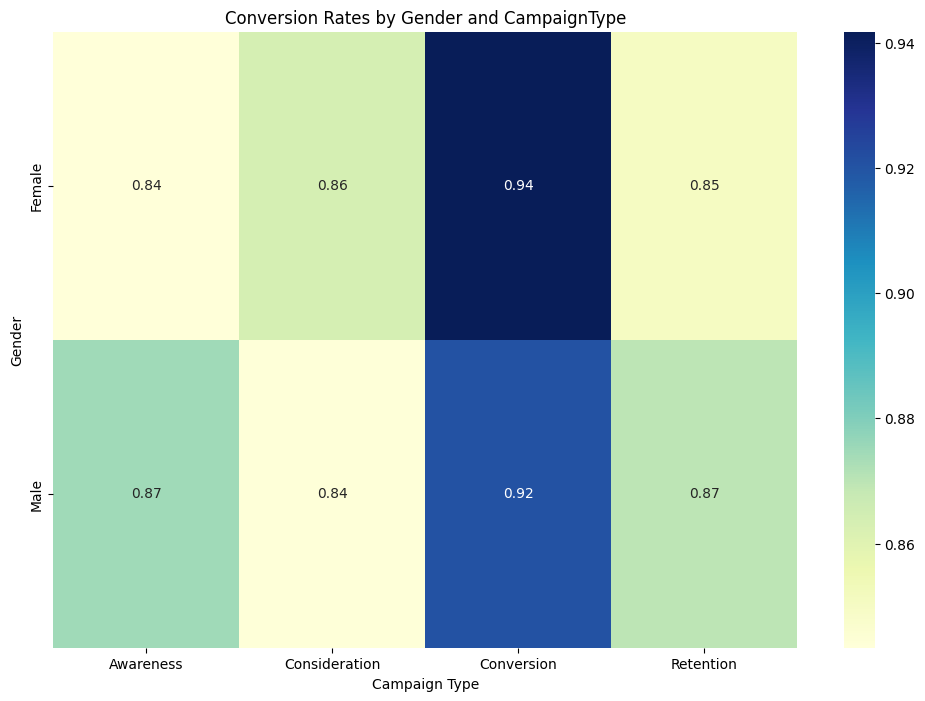

In [ ]:
# conversion rates by Gender and CampaignType
gender_campaign_conversion_rates = df.groupby(['Gender', 'CampaignType'])['Conversion'].mean().unstack()
print("\nConversion rates by Gender and CampaignType:")
print(gender_campaign_conversion_rates)

plt.figure(figsize=(12, 8))
sns.heatmap(gender_campaign_conversion_rates, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Conversion Rates by Gender and CampaignType')
plt.xlabel('Campaign Type')
plt.ylabel('Gender')
plt.show()



Conversion rates by Gender and CampaignChannel:
CampaignChannel     Email       PPC  Referral       SEO  Social Media
Gender                                                               
Female           0.860879  0.888000  0.883080  0.876059      0.871477
Male             0.885191  0.874809  0.883058  0.877888      0.863924


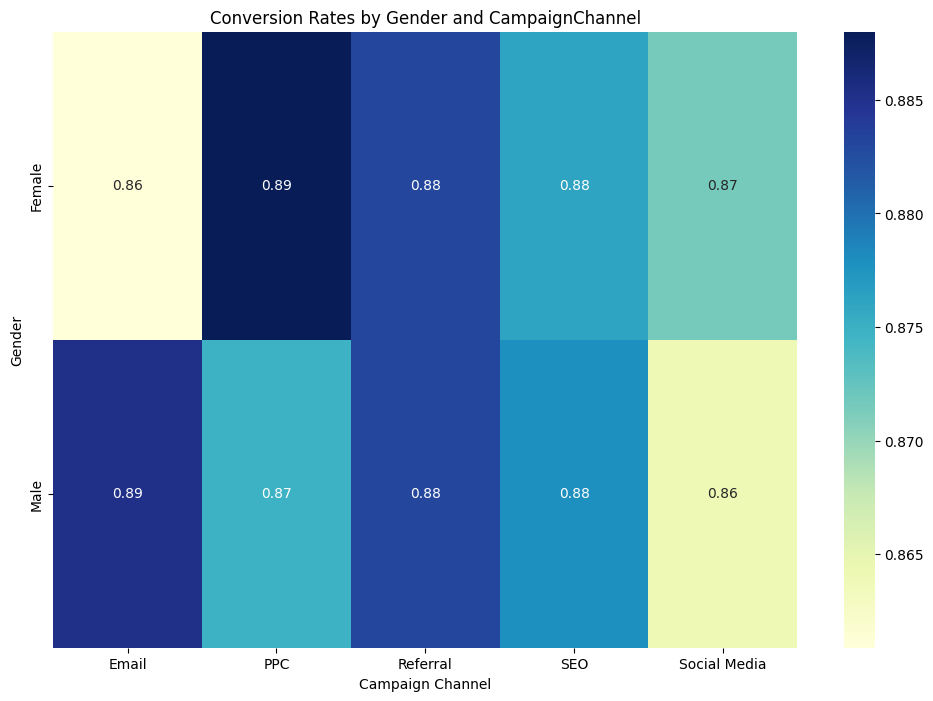

In [ ]:
# conversion rates by Gender and CampaignChannel
gender_channel_conversion_rates = df.groupby(['Gender', 'CampaignChannel'])['Conversion'].mean().unstack()
print("\nConversion rates by Gender and CampaignChannel:")
print(gender_channel_conversion_rates)

plt.figure(figsize=(12, 8))
sns.heatmap(gender_channel_conversion_rates, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Conversion Rates by Gender and CampaignChannel')
plt.xlabel('Campaign Channel')
plt.ylabel('Gender')
plt.show()

In [ ]:
# Conversion Rate
conversion_rate = df['Conversion'].sum() / len(df) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 87.65%


In [ ]:
# Cost per Acquisition
total_cost = df['AdSpend'].sum()
total_customers = len(df[df['Conversion'] == 1])
cpa = total_cost / total_customers
print(f"Cost per Acquisition (CPA): ${cpa:.2f}")

Cost per Acquisition (CPA): $5705.58


In [ ]:
#Click Through Rate
ctr = (df['ClickThroughRate'].sum() / len(df)) * 100
print(f"Click-Through Rate (CTR): {ctr:.2f}%")


Click-Through Rate (CTR): 15.48%


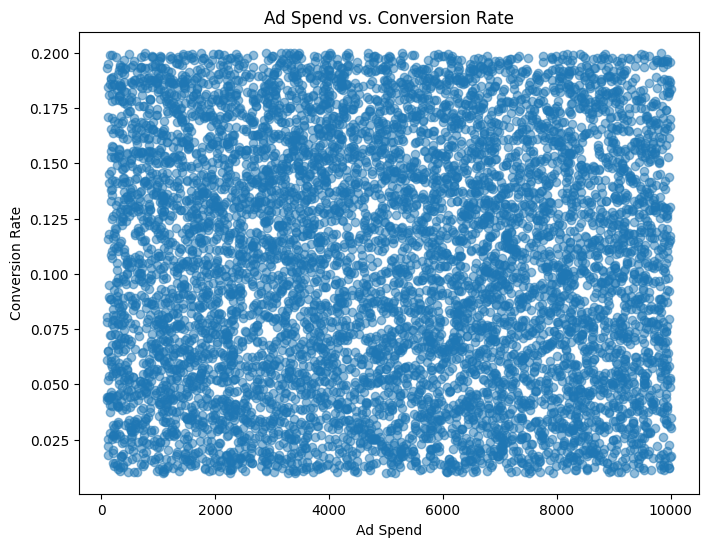

'\nNo Clear Trend: The points are scattered without a clear pattern,\nsuggesting no strong correlation between ad spend and conversion rate within the data range presented.\nVariability in Conversion Rate: Conversion rates vary widely at different ad spend levels,\nindicating that factors other than ad spend may significantly influence conversion rates.\n'

In [ ]:
# Ad Spend by Conversion Rate
plt.figure(figsize=(8, 6))
plt.scatter(df['AdSpend'], df['ConversionRate'], alpha=0.5)
plt.xlabel("Ad Spend")
plt.ylabel("Conversion Rate")
plt.title("Ad Spend vs. Conversion Rate")
plt.show()

'''
No Clear Trend: The points are scattered without a clear pattern,
suggesting no strong correlation between ad spend and conversion rate within the data range presented.
Variability in Conversion Rate: Conversion rates vary widely at different ad spend levels,
indicating that factors other than ad spend may significantly influence conversion rates.
'''

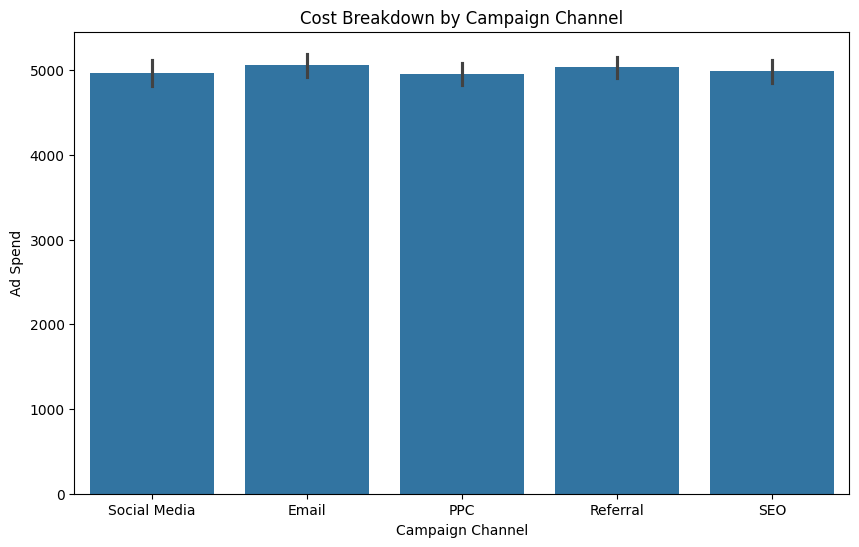

In [ ]:
#Cost Breakdown by Camapign Channels
plt.figure(figsize=(10, 6))
sns.barplot(x='CampaignChannel', y='AdSpend', data=df)
plt.xlabel("Campaign Channel")
plt.ylabel("Ad Spend")
plt.title("Cost Breakdown by Campaign Channel")
plt.show()

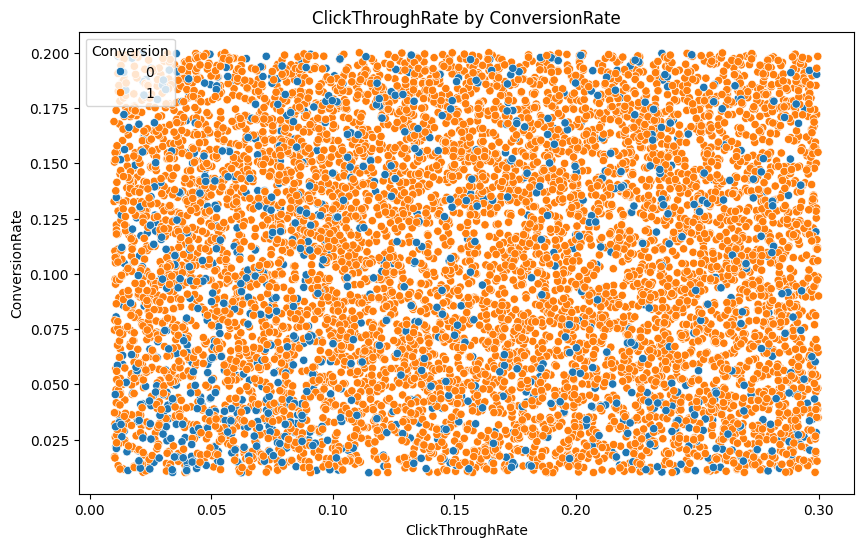

In [ ]:
#ClickThroughRate by ConversionRate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ClickThroughRate', y='ConversionRate', hue='Conversion')
plt.title('ClickThroughRate by ConversionRate')
plt.xlabel('ClickThroughRate')
plt.ylabel('ConversionRate')
plt.show()

In [ ]:
#Group data by mean age and income
df_age_grouped = df.groupby('Age').mean(numeric_only=True).reset_index()
df_age_grouped_sortby_income = df_age_grouped.sort_values('Income')

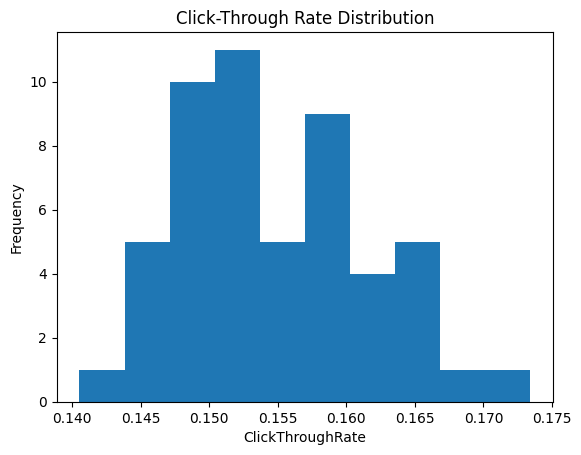

'\nIt can be seen that the mean value of coversion in the age groups with a ClickThroughRate between 0.145 and 0.16 is 0.89,\nwhich means 89% of customers have bought products.\n\nThus, the first conclusion is that if the ClickThroughRate is higher than 0.145,\nthe customer is very likely to buy products after clicking the link of the ads.\n'

In [ ]:
# ClickThroughRate, many times the ads are shown in front of the customers' eyes,
# how possible the customers are going to click the ads?
df_age_grouped.ClickThroughRate.plot(kind='hist')
plt.title('Click-Through Rate Distribution')
plt.xlabel('ClickThroughRate')
plt.ylabel('Frequency')
plt.show()

'''
It can be seen that the mean value of coversion in the age groups with a ClickThroughRate between 0.145 and 0.16 is 0.89,
which means 89% of customers have bought products.

Thus, the first conclusion is that if the ClickThroughRate is higher than 0.145,
the customer is very likely to buy products after clicking the link of the ads.
'''

<ipython-input-32-b1cdf594e8f4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="CampaignType", y="LoyaltyPoints", data=df, ci=None)


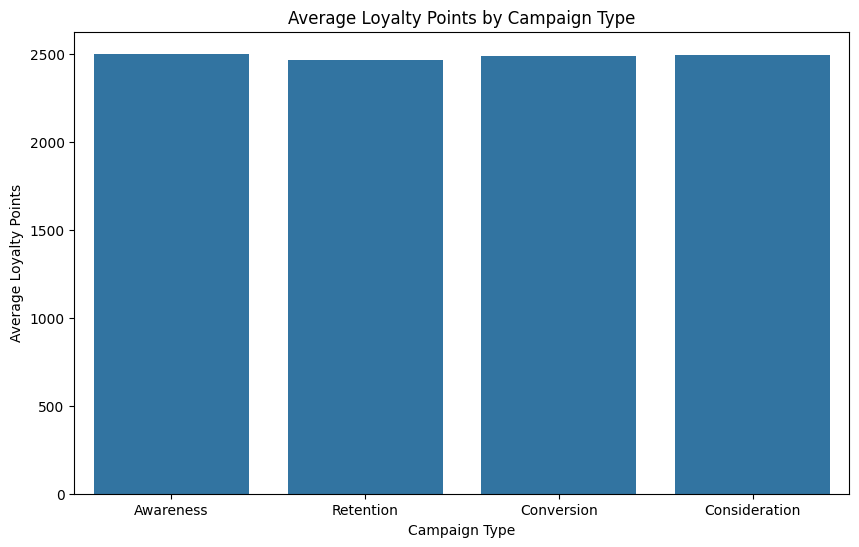

In [ ]:
#Average Loyalty Points by Campaign Type
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignType", y="LoyaltyPoints", data=df, ci=None)
plt.title('Average Loyalty Points by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average Loyalty Points')
plt.show()

<ipython-input-33-19017f93af3e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="CampaignType", y="PagesPerVisit", data=df, ci=None)


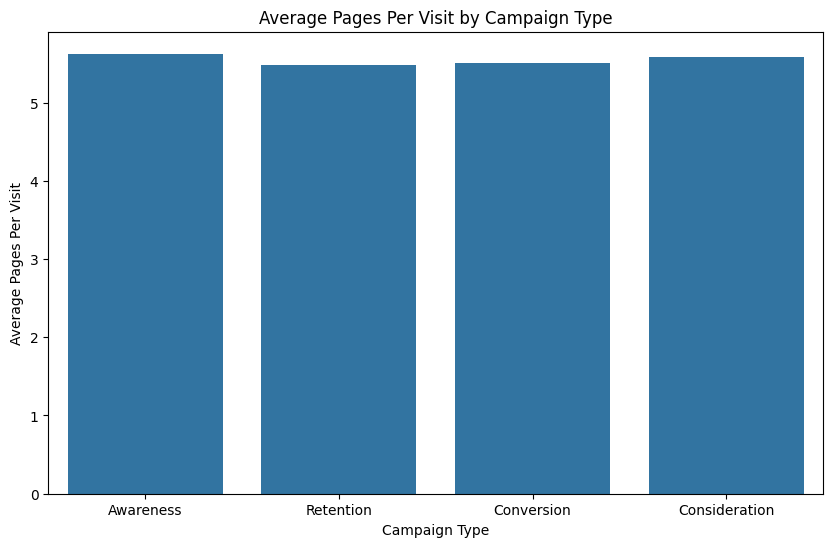

In [ ]:
# Average page per visit by campaign type
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignType", y="PagesPerVisit", data=df, ci=None)
plt.title('Average Pages Per Visit by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average Pages Per Visit')
plt.show()

<ipython-input-34-479ba312d581>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="Gender", y="PagesPerVisit", data=df,ci=None)


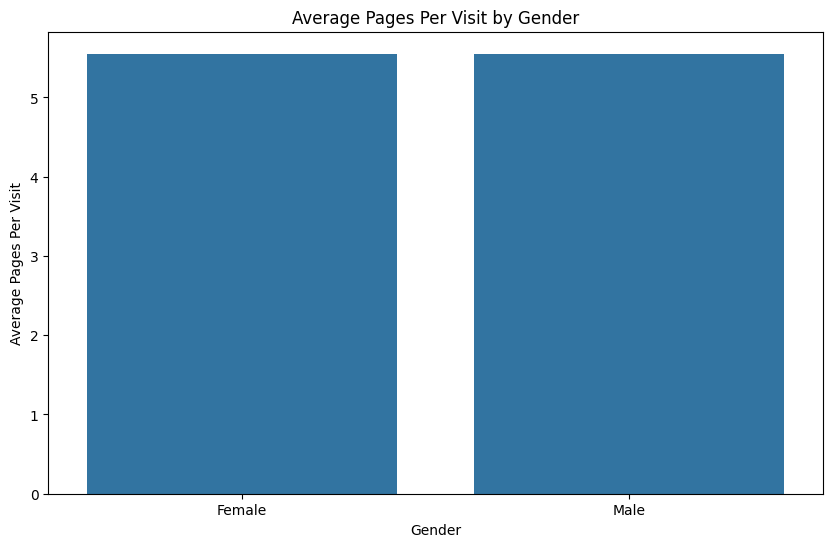

In [ ]:
# average pages per visit by gender
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Gender", y="PagesPerVisit", data=df,ci=None)
plt.title('Average Pages Per Visit by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Pages Per Visit')
plt.show()

<ipython-input-35-7ed17b21088a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="CampaignType", y="TimeOnSite", data=df, ci=None)


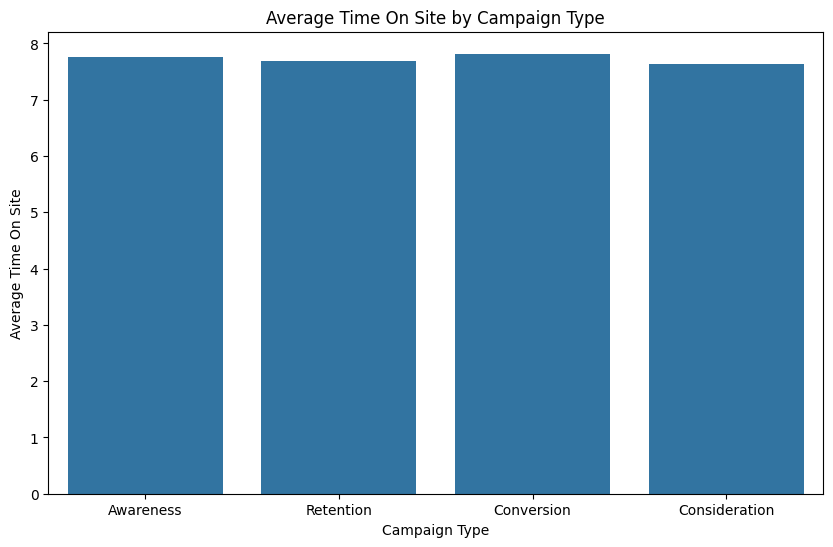

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignType", y="TimeOnSite", data=df, ci=None)
plt.title('Average Time On Site by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average Time On Site')
plt.show()

<ipython-input-36-4698aef32309>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="CampaignType", y="WebsiteVisits", data=df, ci=None)


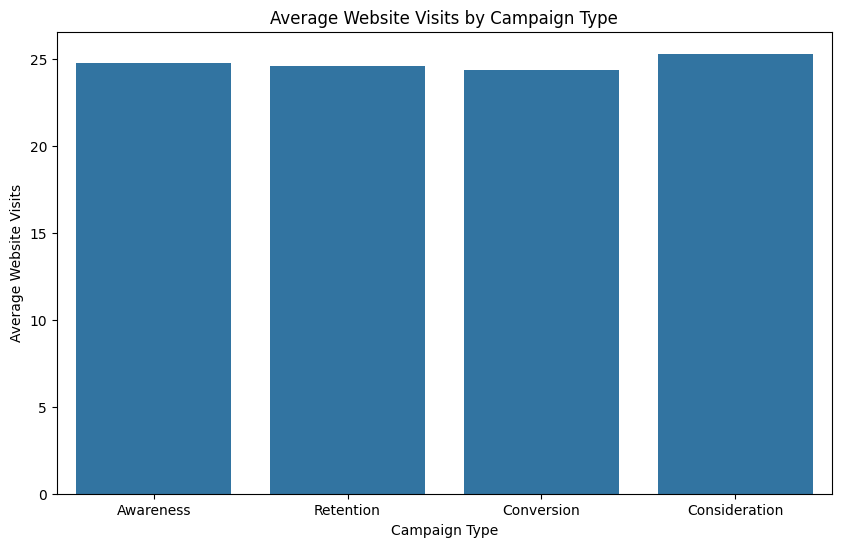

In [ ]:
# average website visits by campaign type
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignType", y="WebsiteVisits", data=df, ci=None)
plt.title('Average Website Visits by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average Website Visits')
plt.show()

Conversion Rate by Marketing Channel:
CampaignChannel
Referral        0.883072
PPC             0.882779
SEO             0.876774
Email           0.870263
Social Media    0.868334
Name: Conversion, dtype: float64


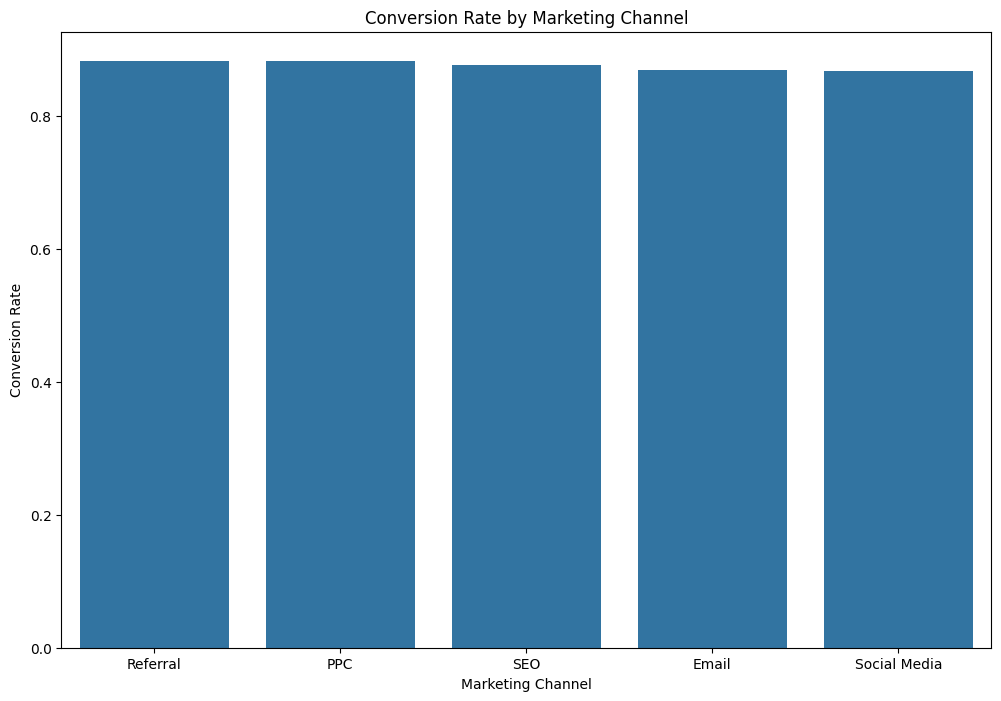

In [ ]:
# conversion rate by marketing channel

conversion_rate_by_channel = df.groupby('CampaignChannel')['Conversion'].mean().sort_values(ascending=False)
print("Conversion Rate by Marketing Channel:")
print(conversion_rate_by_channel)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=conversion_rate_by_channel.index, y=conversion_rate_by_channel.values)
plt.title('Conversion Rate by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Conversion Rate')
plt.show()

In [ ]:
# Average loyalty score for converted vs. lost customers not converted
loyalty_points_by_conversion = df.groupby('Conversion')['LoyaltyPoints'].mean()
print("Average Loyalty Score by Conversion:")
print(loyalty_points_by_conversion)

Average Loyalty Score by Conversion:
Conversion
0    2128.483806
1    2541.244438
Name: LoyaltyPoints, dtype: float64


<ipython-input-39-b380b1174c9a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=loyalty_points_by_conversion.index, y=loyalty_points_by_conversion.values, ci=None)


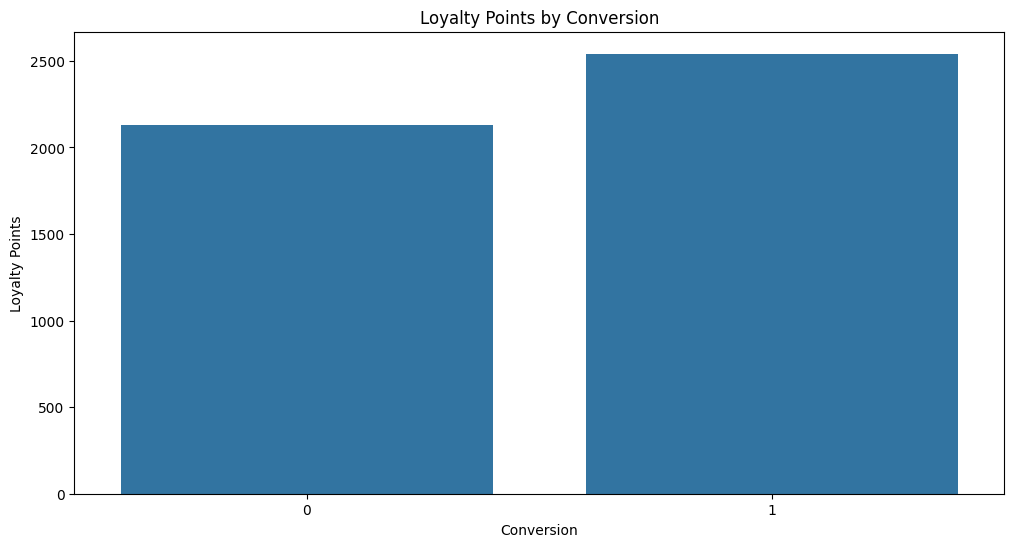

In [ ]:
# Bar chart for average loyalty score by conversion
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=loyalty_points_by_conversion.index, y=loyalty_points_by_conversion.values, ci=None)
plt.title('Loyalty Points by Conversion')
plt.xlabel('Conversion')
plt.ylabel('Loyalty Points')
plt.show()

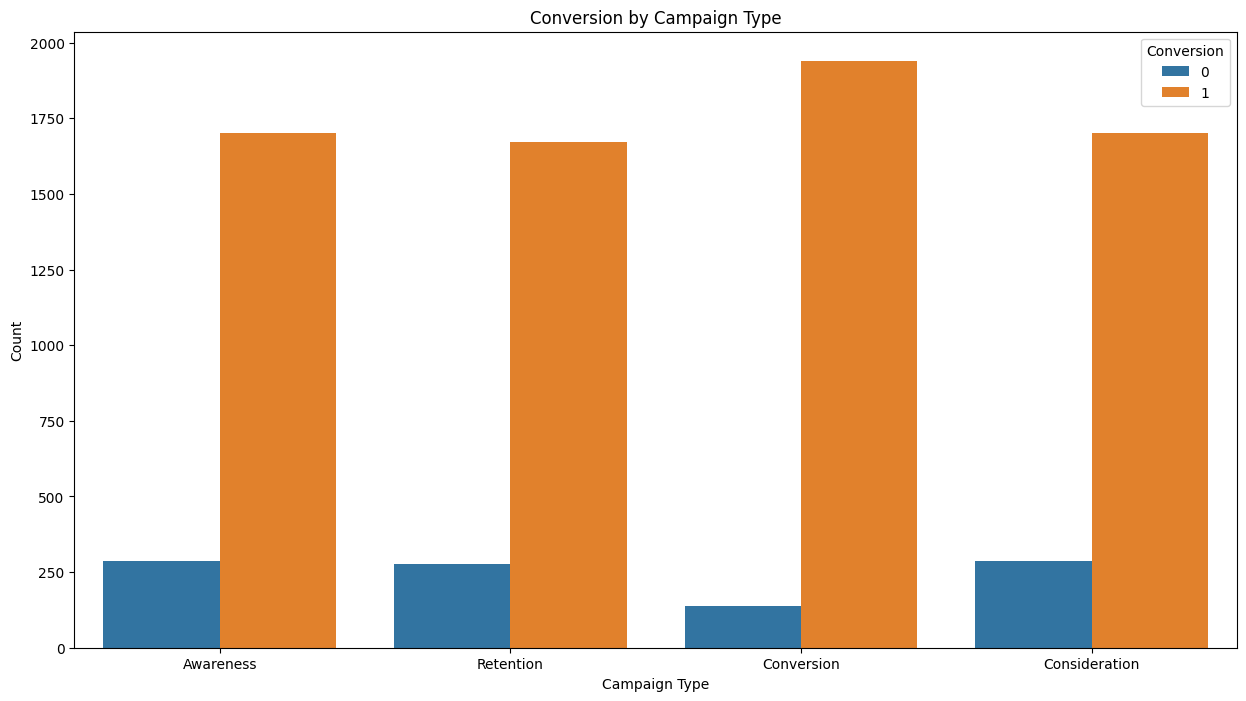

In [ ]:
#Conversion by Campaign Type
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df, x='CampaignType', hue='Conversion')
plt.title('Conversion by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.show()

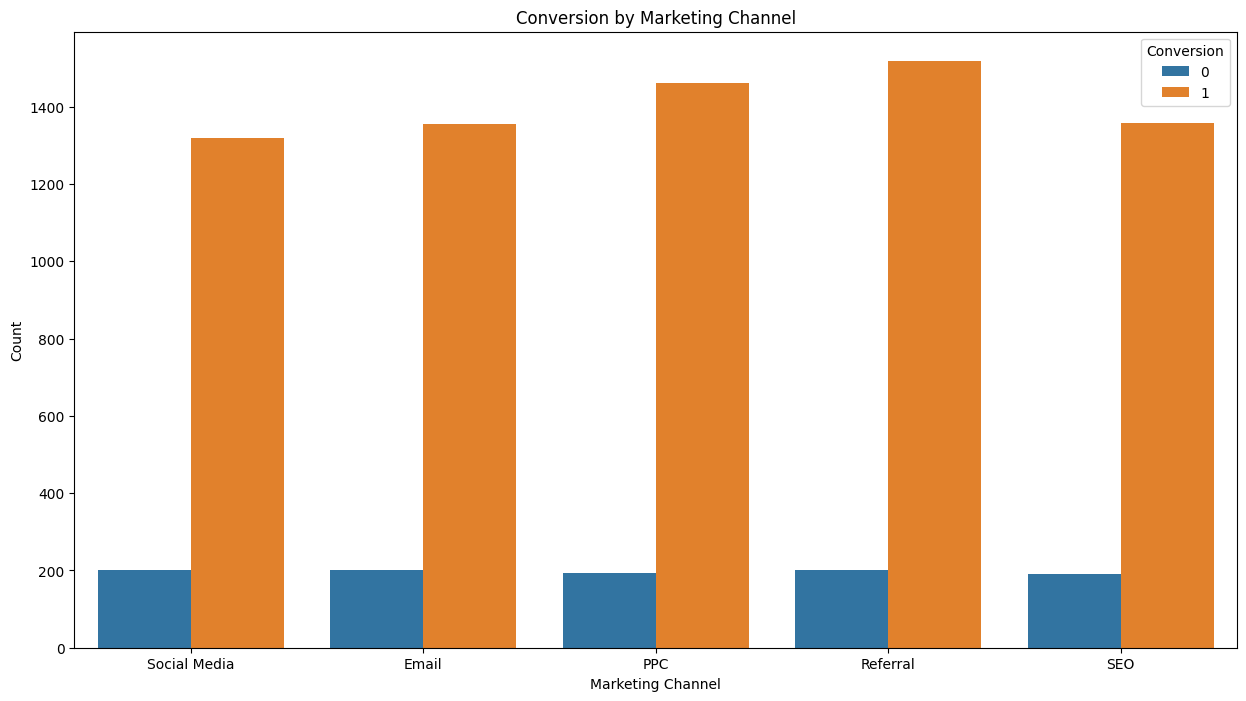

In [ ]:
#Conversion by Marketing Channel
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df, x='CampaignChannel', hue='Conversion')
plt.title('Conversion by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'AdSpend')

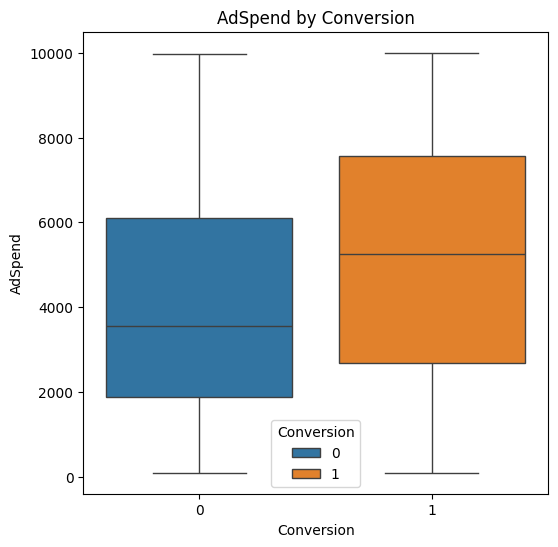

In [ ]:
#AdSpening by Conversion
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='Conversion', y='AdSpend', hue='Conversion')
plt.title('AdSpend by Conversion')
plt.xlabel('Conversion')
plt.ylabel('AdSpend')

Text(0, 0.5, 'ClickThroughRate')

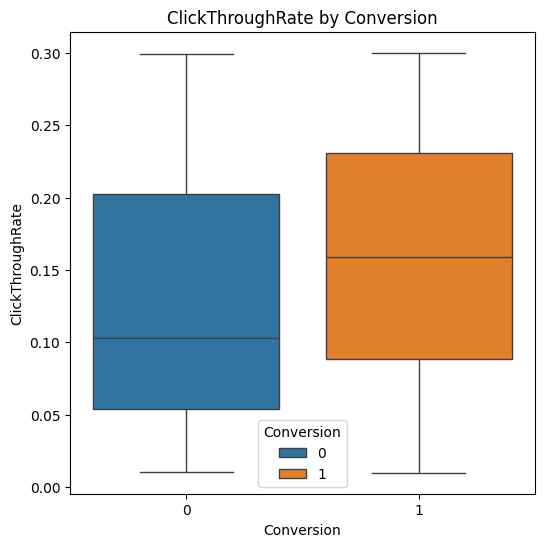

In [ ]:
#Click through rate by conversion
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='Conversion', y='ClickThroughRate', hue='Conversion')
plt.title('ClickThroughRate by Conversion')
plt.xlabel('Conversion')
plt.ylabel('ClickThroughRate')

Text(0.5, 1.0, 'Income by Conversion')

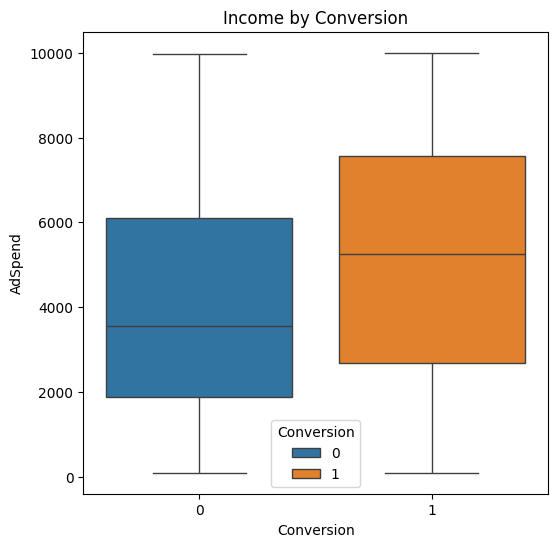

In [ ]:
#Income by Conversion
plt.figure(figsize=(6, 6))
sns.boxplot(x='Conversion', y='AdSpend', data=df, hue='Conversion')
plt.title('Income by Conversion')

Text(0.5, 1.0, 'Website Visits by Conversion')

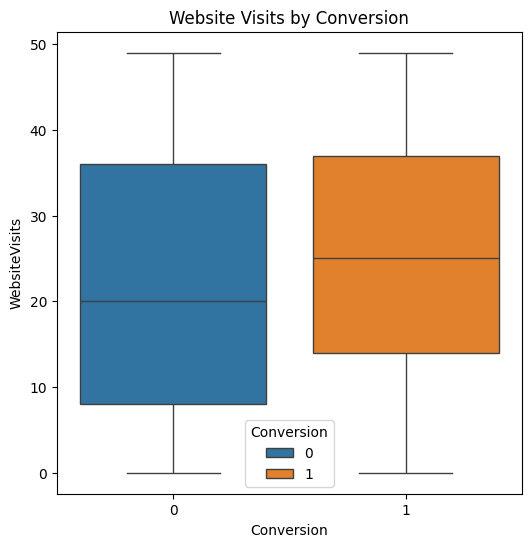

In [ ]:
#Website Visits by Conversion
plt.figure(figsize=(6, 6))
sns.boxplot(x='Conversion', y='WebsiteVisits', data=df, hue='Conversion')
plt.title('Website Visits by Conversion')

Text(0.5, 1.0, 'Time on Site by Conversion')

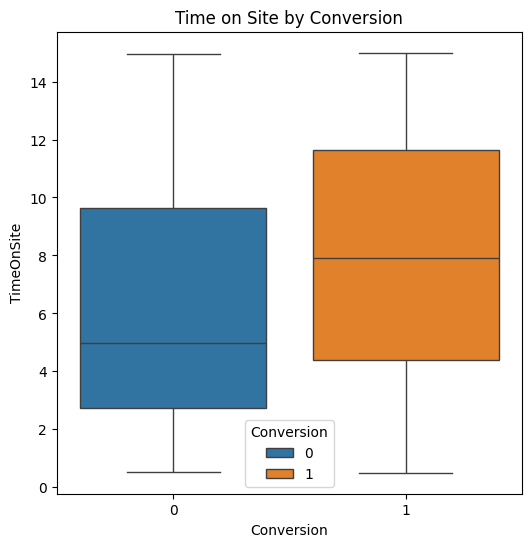

In [ ]:
#Time on Site by Conversion
plt.figure(figsize=(6, 6))
sns.boxplot(x='Conversion', y='TimeOnSite', data=df, hue='Conversion')
plt.title('Time on Site by Conversion')

Text(0.5, 1.0, 'Previous Purchases by Conversion')

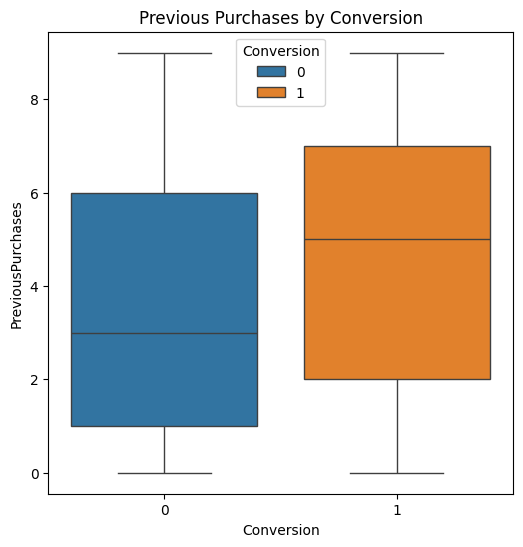

In [ ]:
#Previous Purchases by Conversion
plt.figure(figsize=(6, 6))
sns.boxplot(x='Conversion', y='PreviousPurchases', data=df, hue='Conversion')
plt.title('Previous Purchases by Conversion')

Text(0.5, 1.0, 'LoyaltyPoints by Conversion')

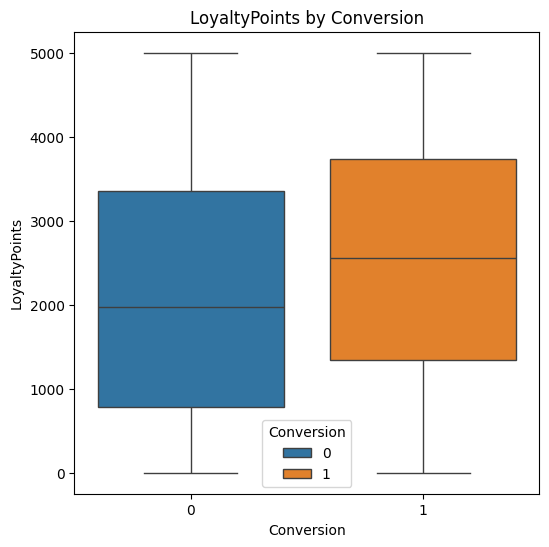

In [ ]:
#Loyalty Points by Conversion
plt.figure(figsize=(6, 6))
sns.boxplot(x='Conversion', y='LoyaltyPoints', data=df, hue='Conversion')
plt.title('LoyaltyPoints by Conversion')

###Conversion

In [ ]:
#group numeric columns into a dataframe
numeric_columns = ['Age','Income','AdSpend','ClickThroughRate','ConversionRate','WebsiteVisits','PagesPerVisit','TimeOnSite','SocialShares','PreviousPurchases','LoyaltyPoints','Conversion']

#group the numeric data by campaign channel and conversion rate
df_groupby_CampaignChannel = df.groupby('CampaignChannel')[numeric_columns].mean().reset_index()
df_groupby_CampaignType = df.groupby('CampaignType')[numeric_columns].mean().reset_index()
df_groupby_CampaignChannel_CampaignType = df.groupby(['CampaignChannel','CampaignType'])[numeric_columns].mean().reset_index()

In [ ]:
#Conversion rate for Campaign Channel
df_groupby_CampaignChannel[['CampaignChannel','Conversion']].sort_values(by='Conversion',ascending=False)

CampaignChannel  Conversion
2        Referral    0.883072
1             PPC    0.882779
3             SEO    0.876774
0           Email    0.870263
4    Social Media    0.868334

In [ ]:
#Conversion rate by campaign type
df_groupby_CampaignType[['CampaignType','Conversion']].sort_values(by='Conversion',ascending=False)

CampaignType  Conversion
2     Conversion    0.933558
3      Retention    0.858243
0      Awareness    0.855634
1  Consideration    0.855634

In [ ]:
#Combine the conversion rate with campaign channel and type
df_groupby_CampaignChannel_CampaignType[['CampaignChannel','CampaignType','Conversion']].sort_values(by='Conversion',ascending=False)

CampaignChannel   CampaignType  Conversion
14             SEO     Conversion    0.940299
6              PPC     Conversion    0.939597
2            Email     Conversion    0.932692
10        Referral     Conversion    0.930337
18    Social Media     Conversion    0.923706
8         Referral      Awareness    0.883991
5              PPC  Consideration    0.868812
15             SEO      Retention    0.866324
19    Social Media      Retention    0.862162
11        Referral      Retention    0.860092
4              PPC      Awareness    0.859223
7              PPC      Retention    0.857143
1            Email  Consideration    0.856079
9         Referral  Consideration    0.855037
17    Social Media  Consideration    0.849383
12             SEO      Awareness    0.848718
13             SEO  Consideration    0.848238
3            Email      Retention    0.844444
0            Email      Awareness    0.841270
16    Social Media      Awareness    0.840849

AdSpend

In [ ]:
# group dataframe for campaign channels and the amount of advertising spending
df_groupby_CampaignChannel[['CampaignChannel','AdSpend']].sort_values(by='AdSpend',ascending=False)

CampaignChannel      AdSpend
0           Email  5055.604272
2        Referral  5034.042284
3             SEO  4994.131533
4    Social Media  4965.321428
1             PPC  4954.221741

In [ ]:
# campaign type by advertising spending
df_groupby_CampaignType[['CampaignType','AdSpend']].sort_values(by='AdSpend',ascending=False)

CampaignType      AdSpend
0      Awareness  5069.338947
3      Retention  5017.135162
1  Consideration  4960.399233
2     Conversion  4959.112653

In [ ]:
# combine the tables that breakdown the costs of advertising by camapign channels and campaign type
df_groupby_CampaignChannel_CampaignType[['CampaignChannel','CampaignType','AdSpend']].sort_values(by='AdSpend',ascending=False)

CampaignChannel   CampaignType      AdSpend
3            Email      Retention  5204.585578
16    Social Media      Awareness  5183.625376
2            Email     Conversion  5169.923986
8         Referral      Awareness  5151.421571
12             SEO      Awareness  5132.001477
7              PPC      Retention  5008.451401
9         Referral  Consideration  5004.175064
5              PPC  Consideration  5003.265222
10        Referral     Conversion  5002.671732
4              PPC      Awareness  4992.213287
11        Referral      Retention  4977.907837
15             SEO      Retention  4971.795251
1            Email  Consideration  4968.120976
13             SEO  Consideration  4944.592092
19    Social Media      Retention  4937.843876
14             SEO     Conversion  4927.463843
0            Email      Awareness  4881.174370
17    Social Media  Consideration  4880.365527
18    Social Media     Conversion  4862.523732
6              PPC     Conversion  4827.322165

ROI

In [ ]:
# Calculate the ROI using advertising spending and the number of conversions
print(f"The ROI of each campaign channel: ")
df_groupby_CampaignChannel['CampaignChannelROI'] = df_groupby_CampaignChannel['AdSpend']/df_groupby_CampaignChannel['Conversion']
df_groupby_CampaignChannel[['CampaignChannel','CampaignChannelROI']].sort_values(by='CampaignChannelROI',ascending=False)

The ROI of each campaign channel: 


CampaignChannel  CampaignChannelROI
0           Email         5809.281071
4    Social Media         5718.213229
2        Referral         5700.605195
3             SEO         5696.029342
1             PPC         5612.071856

In [ ]:
#ROI value of campaign channel
print(f"The ROI of each campaign channel: ")
df_groupby_CampaignChannel['CampaignChannelROI'] = df_groupby_CampaignChannel['Conversion']/df_groupby_CampaignChannel['AdSpend']
df_groupby_CampaignChannel[['CampaignChannel','CampaignChannelROI']].sort_values(by='CampaignChannelROI',ascending=False)


The ROI of each campaign channel: 


CampaignChannel  CampaignChannelROI
1             PPC            0.000178
3             SEO            0.000176
2        Referral            0.000175
4    Social Media            0.000175
0           Email            0.000172

In [ ]:
#ROI of spending by campaign type
print(f"The ROI of each campaign type: ")
df_groupby_CampaignType['CampaignTypeROI'] = df_groupby_CampaignType['AdSpend']/df_groupby_CampaignType['Conversion']
df_groupby_CampaignType[['CampaignType','CampaignTypeROI']].sort_values(by='CampaignTypeROI',ascending=False)

The ROI of each campaign type: 


CampaignType  CampaignTypeROI
0      Awareness      5924.659510
3      Retention      5845.818169
1  Consideration      5797.339021
2     Conversion      5312.056205

In [ ]:
#ROI campaign type
print(f"The ROI of each campaign type: ")
df_groupby_CampaignType['CampaignTypeROI'] = df_groupby_CampaignType['Conversion']/df_groupby_CampaignType['AdSpend']
df_groupby_CampaignType[['CampaignType','CampaignTypeROI']].sort_values(by='CampaignTypeROI',ascending=False)

The ROI of each campaign type: 


CampaignType  CampaignTypeROI
2     Conversion         0.000188
1  Consideration         0.000172
3      Retention         0.000171
0      Awareness         0.000169

In [ ]:
#Campaign Type Channel ROI
print(f"The ROI of each campaign type and campaign channel combination: ")
df_groupby_CampaignChannel_CampaignType['CampaignTypeChannelROI'] = df_groupby_CampaignChannel_CampaignType['AdSpend']/df_groupby_CampaignChannel_CampaignType['Conversion']
df_groupby_CampaignChannel_CampaignType[['CampaignChannel','CampaignType','CampaignTypeChannelROI']].sort_values(by='CampaignTypeChannelROI',ascending=False)

The ROI of each campaign type and campaign channel combination: 


CampaignChannel   CampaignType  CampaignTypeChannelROI
16    Social Media      Awareness             6164.753208
3            Email      Retention             6163.325027
12             SEO      Awareness             6046.769112
9         Referral  Consideration             5852.584055
7              PPC      Retention             5843.193301
13             SEO  Consideration             5829.247546
8         Referral      Awareness             5827.461147
4              PPC      Awareness             5810.146538
1            Email  Consideration             5803.341314
0            Email      Awareness             5802.150667
11        Referral      Retention             5787.647512
5              PPC  Consideration             5758.744016
17    Social Media  Consideration             5745.779182
15             SEO      Retention             5738.956536
19    Social Media      Retention             5727.279731
2            Email     Conversion             5543.011284
10        Referral     Conversion             5377.267924
18    Social Media     Conversion             5264.148111
14             SEO     Conversion             5240.318690
6              PPC     Conversion             5137.650019

In [ ]:
#The ROI of each campaign type and campaign channel combination
print(f"The ROI of each campaign type and campaign channel combination: ")
df_groupby_CampaignChannel_CampaignType['CampaignTypeChannelROI'] = df_groupby_CampaignChannel_CampaignType['Conversion']/df_groupby_CampaignChannel_CampaignType['AdSpend']
df_groupby_CampaignChannel_CampaignType[['CampaignChannel','CampaignType','CampaignTypeChannelROI']].sort_values(by='CampaignTypeChannelROI',ascending=False)

The ROI of each campaign type and campaign channel combination: 


CampaignChannel   CampaignType  CampaignTypeChannelROI
6              PPC     Conversion                0.000195
14             SEO     Conversion                0.000191
18    Social Media     Conversion                0.000190
10        Referral     Conversion                0.000186
2            Email     Conversion                0.000180
19    Social Media      Retention                0.000175
15             SEO      Retention                0.000174
17    Social Media  Consideration                0.000174
5              PPC  Consideration                0.000174
11        Referral      Retention                0.000173
0            Email      Awareness                0.000172
1            Email  Consideration                0.000172
4              PPC      Awareness                0.000172
8         Referral      Awareness                0.000172
13             SEO  Consideration                0.000172
7              PPC      Retention                0.000171
9         Referral  Consideration                0.000171
12             SEO      Awareness                0.000165
3            Email      Retention                0.000162
16    Social Media      Awareness                0.000162

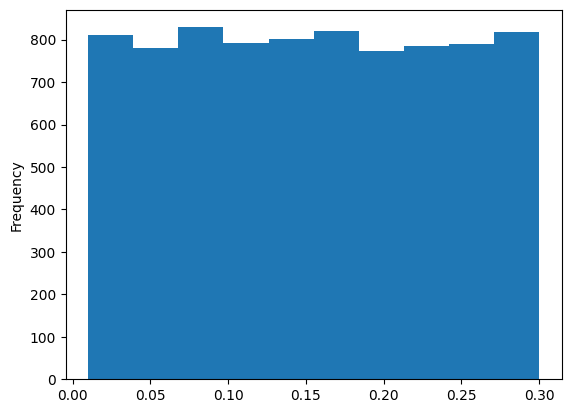

In [ ]:
#Click through rate distribution
df.ClickThroughRate.plot(kind='hist')
plt.show()

In [ ]:
#Ratio of customers who are converted with clickthroughrate ranges
ClickThroughRate_group1 = df[(df['ClickThroughRate']>=0.01)&(df['ClickThroughRate']<0.1)]
ClickThroughRate_group2 = df[(df['ClickThroughRate']>=0.1)&(df['ClickThroughRate']<0.2)]
ClickThroughRate_group3 = df[(df['ClickThroughRate']>=0.2)&(df['ClickThroughRate']<=0.3)]
print(f'The ratio of customers who are converted with the ClickThroughRate between 0.01 and 0.1 is {round(ClickThroughRate_group1.Conversion.sum()/ClickThroughRate_group1.Conversion.count(),2)}.')
print(f'The ratio of customers who are converted with the ClickThroughRate between 0.1 and 0.2 is {round(ClickThroughRate_group2.Conversion.sum()/ClickThroughRate_group2.Conversion.count(),2)}.')
print(f'The ratio of customers who are converted with the ClickThroughRate between 0.2 and 0.3 is {round(ClickThroughRate_group3.Conversion.sum()/ClickThroughRate_group3.Conversion.count(),2)}.')

The ratio of customers who are converted with the ClickThroughRate between 0.01 and 0.1 is 0.81.
The ratio of customers who are converted with the ClickThroughRate between 0.1 and 0.2 is 0.91.
The ratio of customers who are converted with the ClickThroughRate between 0.2 and 0.3 is 0.91.


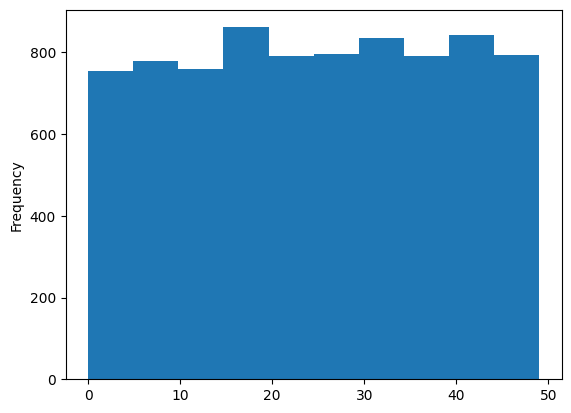

In [ ]:
#Website Visits Distributions
df.WebsiteVisits.plot(kind='hist')
plt.show()

In [ ]:
#ratio of customers who are converted and have visited the websites
WebsiteVisits_group1 = df[(df['WebsiteVisits']>=0)&(df['WebsiteVisits']<16)]
WebsiteVisits_group2 = df[(df['WebsiteVisits']>=16)&(df['WebsiteVisits']<32)]
WebsiteVisits_group3 = df[(df['WebsiteVisits']>=32)&(df['WebsiteVisits']<=50)]
print(f'The ratio of customers who are converted and have visited the websites from 0 to 16 times is {round(WebsiteVisits_group1.Conversion.sum()/WebsiteVisits_group1.Conversion.count(),2)}.')
print(f'The ratio of customers who are converted and have visited the websites from 16 to 32 times is {round(WebsiteVisits_group2.Conversion.sum()/WebsiteVisits_group2.Conversion.count(),2)}.')
print(f'The ratio of customers who are converted and have visited the websites from 32 to 50 times is {round(WebsiteVisits_group3.Conversion.sum()/WebsiteVisits_group3.Conversion.count(),2)}.')

The ratio of customers who are converted and have visited the websites from 0 to 16 times is 0.83.
The ratio of customers who are converted and have visited the websites from 16 to 32 times is 0.9.
The ratio of customers who are converted and have visited the websites from 32 to 50 times is 0.89.


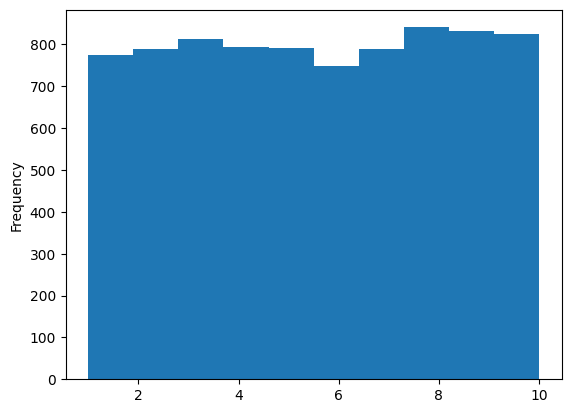

In [ ]:
#Pages per visit distribution
df.PagesPerVisit.plot(kind='hist')
plt.show()

In [ ]:
#ratio of customers who are converted and have visited
PagesPerVisit_group1 = df[(df['PagesPerVisit']>=0)&(df['PagesPerVisit']<3)]
PagesPerVisit_group2 = df[(df['PagesPerVisit']>=3)&(df['PagesPerVisit']<6)]
PagesPerVisit_group3 = df[(df['PagesPerVisit']>=6)&(df['PagesPerVisit']<=10)]
print(f'The ratio of customers who are converted and have visited from 0 to 3 websites is {round(PagesPerVisit_group1.Conversion.sum()/PagesPerVisit_group1.Conversion.count(),2)}.')
print(f'The ratio of customers who are converted and have visited from 3 to 6 websites is {round(PagesPerVisit_group2.Conversion.sum()/PagesPerVisit_group2.Conversion.count(),2)}.')
print(f'The ratio of customers who are converted and have visited from 6 to 10 websites is {round(PagesPerVisit_group3.Conversion.sum()/PagesPerVisit_group3.Conversion.count(),2)}.')

The ratio of customers who are converted and have visited from 0 to 3 websites is 0.78.
The ratio of customers who are converted and have visited from 3 to 6 websites is 0.91.
The ratio of customers who are converted and have visited from 6 to 10 websites is 0.9.


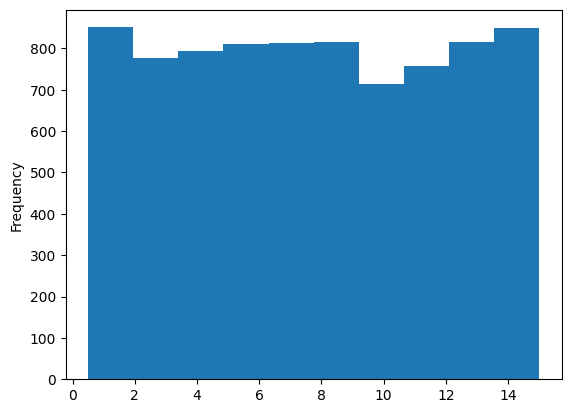

In [ ]:
#time on site distribution
df.TimeOnSite.plot(kind='hist')
plt.show()

In [ ]:
#ratio of customers who are converted and have spent
TimeOnSite_group1 = df[(df['TimeOnSite']>=0)&(df['TimeOnSite']<5)]
TimeOnSite_group2 = df[(df['TimeOnSite']>=5)&(df['TimeOnSite']<10)]
TimeOnSite_group3 = df[(df['TimeOnSite']>=10)&(df['TimeOnSite']<=15)]
print(f'The ratio of customers who are converted and have spent from 0 to 5 minutes is {round(TimeOnSite_group1.Conversion.sum()/TimeOnSite_group1.Conversion.count(),2)}.')
print(f'The ratio of customers who are converted and have spent from 5 to 10 minutes is {round(TimeOnSite_group2.Conversion.sum()/TimeOnSite_group2.Conversion.count(),2)}.')
print(f'The ratio of customers who are converted and have spent from 10 to 15 minutes is {round(TimeOnSite_group3.Conversion.sum()/TimeOnSite_group3.Conversion.count(),2)}.')

The ratio of customers who are converted and have spent from 0 to 5 minutes is 0.8.
The ratio of customers who are converted and have spent from 5 to 10 minutes is 0.91.
The ratio of customers who are converted and have spent from 10 to 15 minutes is 0.92.


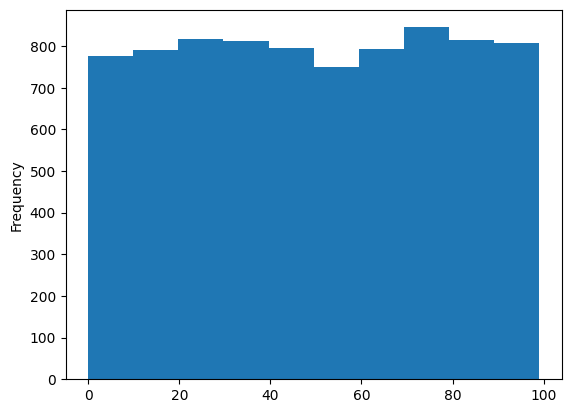

In [ ]:
#social shares distribution
df.SocialShares.plot(kind='hist')
plt.show()

In [ ]:
#ratio of customers who are converted and have shared the ads' info
SocialShares_group1 = df[(df['SocialShares']>=0)&(df['SocialShares']<20)]
SocialShares_group2 = df[(df['SocialShares']>=20)&(df['SocialShares']<40)]
SocialShares_group3 = df[(df['SocialShares']>=40)&(df['SocialShares']<=60)]
SocialShares_group4 = df[(df['SocialShares']>=80)&(df['SocialShares']<=100)]
print(f"The ratio of customers who are converted and have shared the ads' info from 0 to 20 times is {round(SocialShares_group1.Conversion.sum()/SocialShares_group1.Conversion.count(),3)}.")
print(f"The ratio of customers who are converted and have spent the ads' info from 20 to 40 times is {round(SocialShares_group2.Conversion.sum()/SocialShares_group2.Conversion.count(),3)}.")
print(f"The ratio of customers who are converted and have spent spent the ads' info from 60 to 80 times is {round(SocialShares_group3.Conversion.sum()/SocialShares_group3.Conversion.count(),3)}.")
print(f"The ratio of customers who are converted and have spent spent the ads' info from 80 to 100 times is {round(SocialShares_group4.Conversion.sum()/SocialShares_group4.Conversion.count(),3)}.")

The ratio of customers who are converted and have shared the ads' info from 0 to 20 times is 0.88.
The ratio of customers who are converted and have spent the ads' info from 20 to 40 times is 0.883.
The ratio of customers who are converted and have spent spent the ads' info from 60 to 80 times is 0.872.
The ratio of customers who are converted and have spent spent the ads' info from 80 to 100 times is 0.868.


In [ ]:
#Create new variable for click through rate = Email clicks/ Email Opens
df['EmailClickThroughRate'] = df['EmailClicks']/df['EmailOpens']
df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

   Conversion  EmailClickThroughRate  
0           1               1.500000  
1           1               3.500000  
2           1               0.181818  
3           1               1.000000  
4           1               1.000000

In [ ]:
#ratio of customers who are converted and click the link in the email
EmailClickThroughRate_group1 = df[df['EmailClickThroughRate']>=1]
EmailClickThroughRate_group2 = df[df['EmailClickThroughRate']<1]
print(f"The ratio of customers who are converted and click the link in the email without clicking into the email is {round(EmailClickThroughRate_group1.Conversion.sum()/EmailClickThroughRate_group1.Conversion.count(),2)}.")
print(f"The ratio of customers who are converted and click the link in the email by clicking into the email is {round(EmailClickThroughRate_group2.Conversion.sum()/EmailClickThroughRate_group2.Conversion.count(),2)}.")

The ratio of customers who are converted and click the link in the email without clicking into the email is 0.85.
The ratio of customers who are converted and click the link in the email by clicking into the email is 0.89.


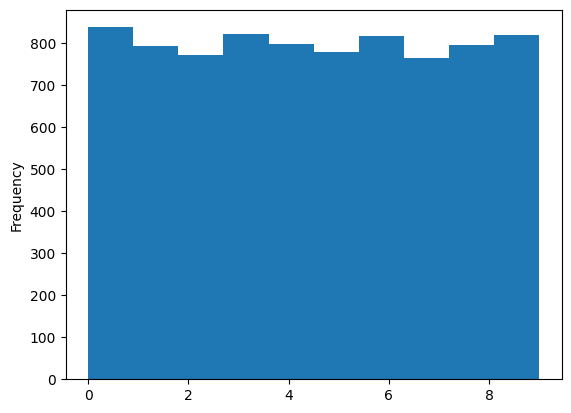

In [ ]:
#previous purchase distribution
df.PreviousPurchases.plot(kind='hist')
plt.show()

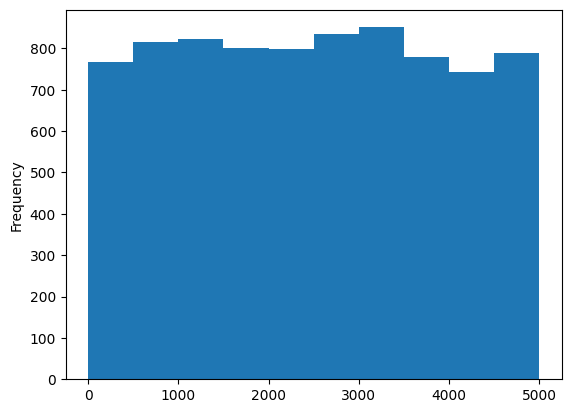

In [ ]:
#loyalty points distribtion
df.LoyaltyPoints.plot(kind='hist')
plt.show()

### Outliers


<ipython-input-76-879034bda770>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[column],orient='h',palette='viridis')
<ipython-input-76-879034bda770>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[column],orient='h',palette='viridis')
<ipython-input-76-879034bda770>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[column],orient='h',palette='viridis')
<ipython-input-76-879034bda770>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` an

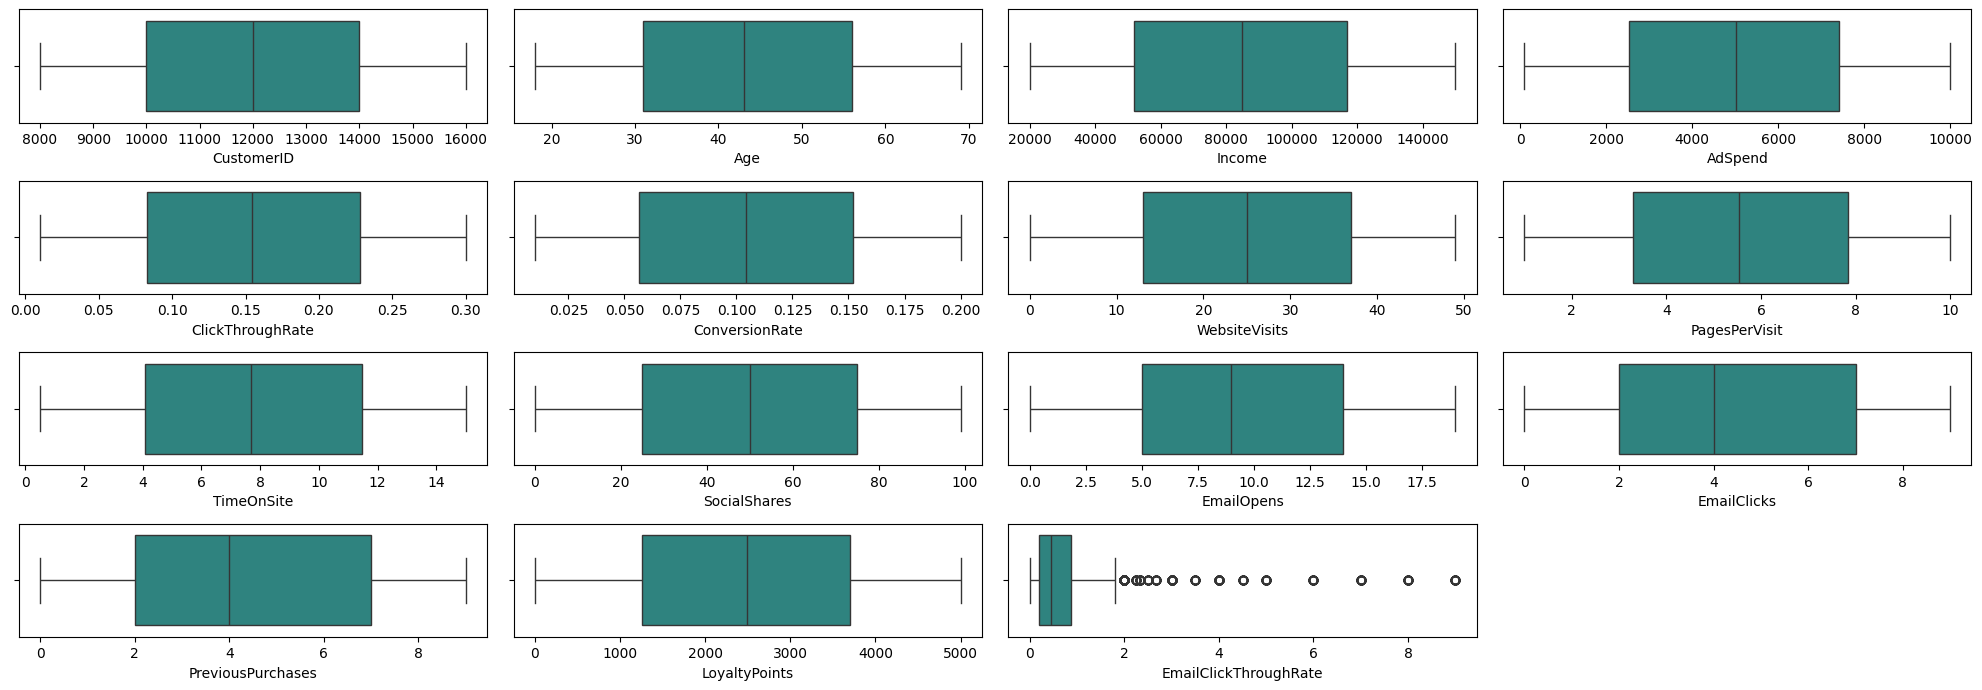

In [ ]:
### since the there is no null value in the data now i will check the outliers
data = df.drop(columns='Conversion')
plt.figure(figsize = (20, 10))
x = 1

for column in data.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(data[column],orient='h',palette='viridis')
    plt.ylabel('')
    x+=1

plt.tight_layout()

# we can see that there are no outliers in  the columns that means the data is clean and we can go

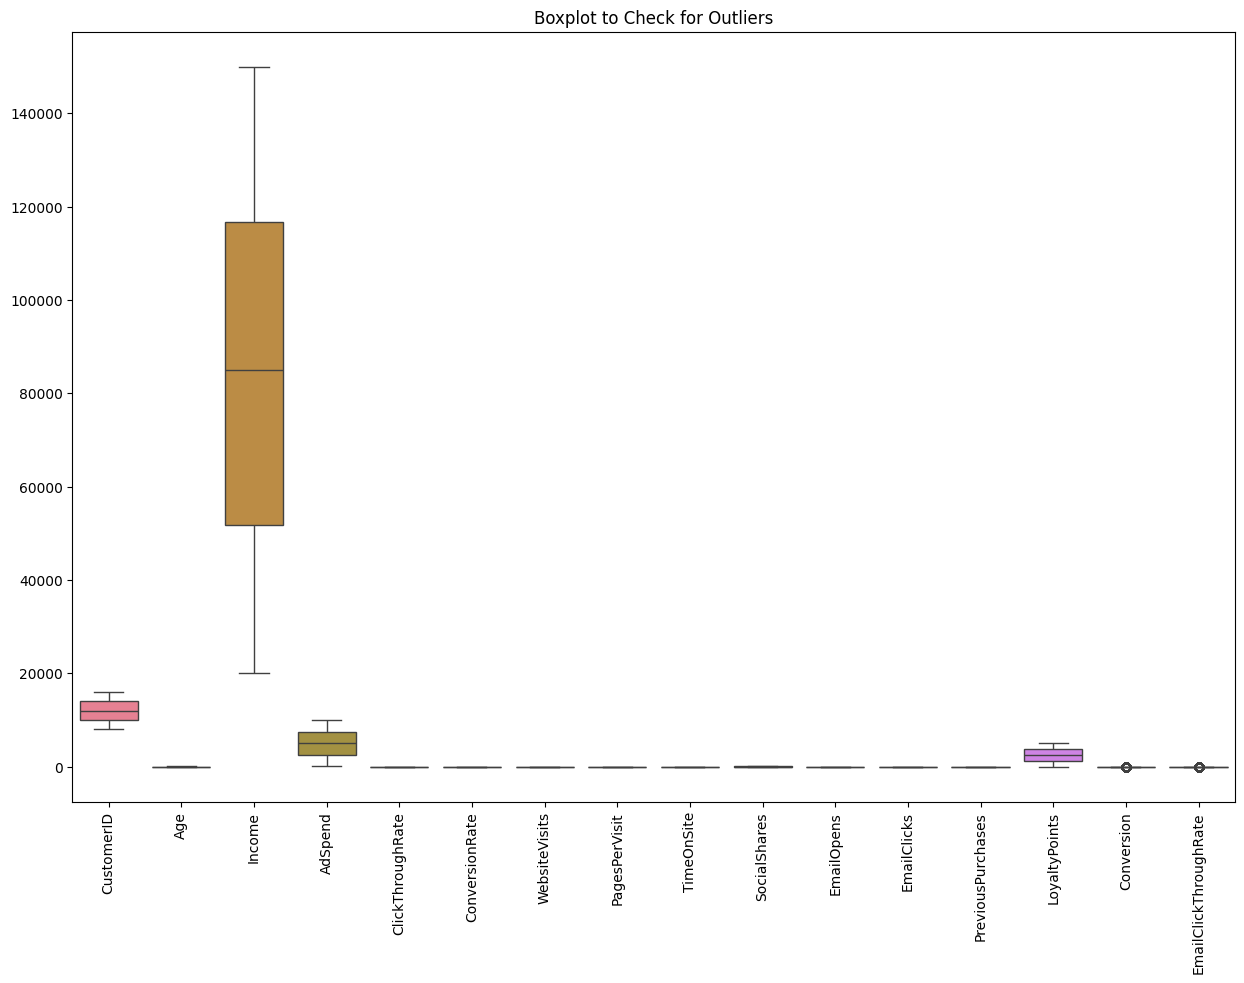

In [ ]:
#box plot to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot to Check for Outliers')
plt.show()

# **Supervised Learning Model**

In [ ]:
#separate the data into independent and dependent variables in the dataset and assign them their respective variables
# -- Conversion is the dependent so it is the y variable

df0 = df
X = df0.drop(['CustomerID', 'Conversion','EmailClickThroughRate'], axis =1)
y = df0['Conversion']

a = y.value_counts()
print(a)

Conversion
1    7012
0     988
Name: count, dtype: int64


In [ ]:
# get the dummy variables for the dataset categorical dependent variables
X_encoded = pd.get_dummies(X)

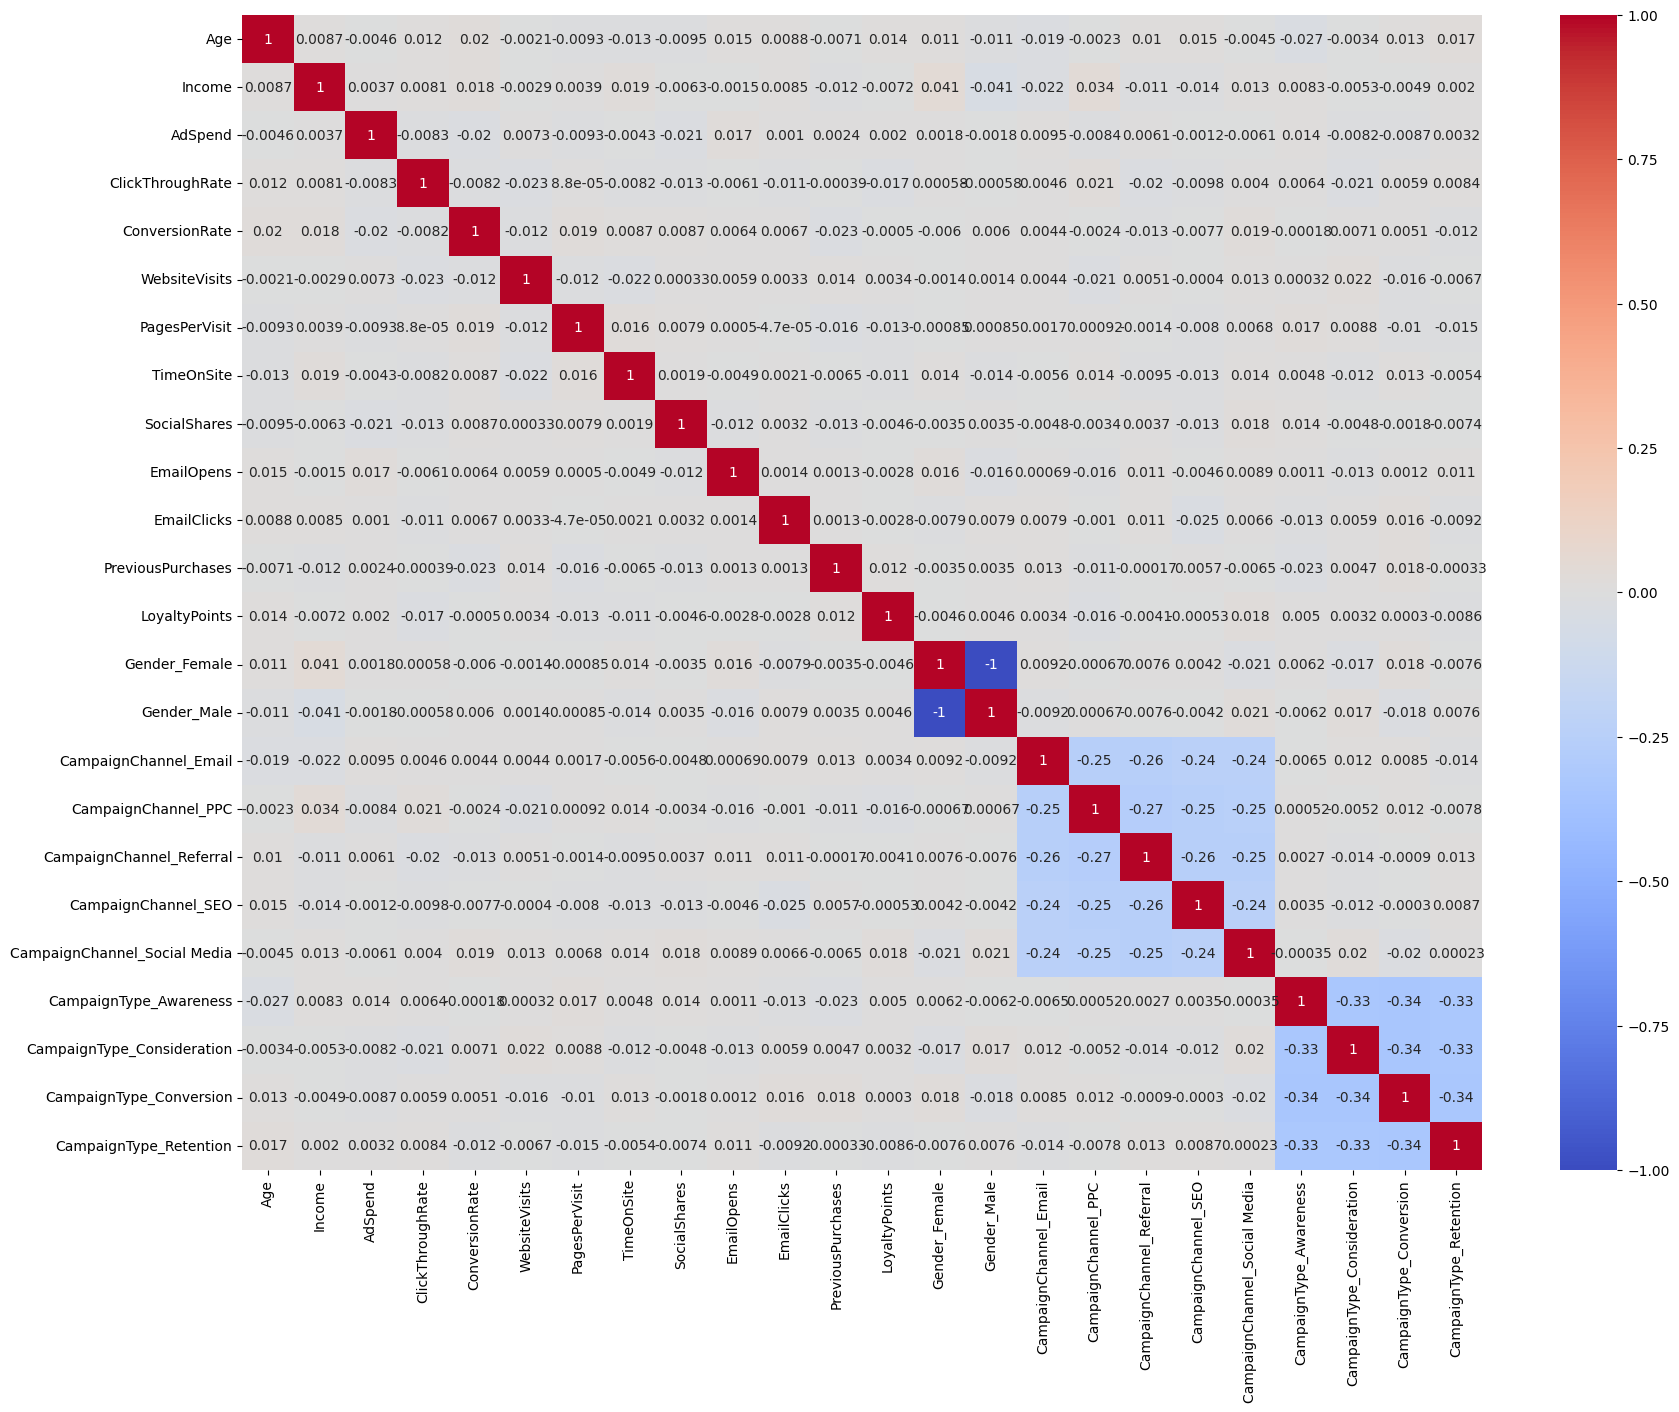

In [ ]:
# correlation of the dependent variables after getting the dummy variables

plt.figure(figsize=(20,15))
corr = X_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

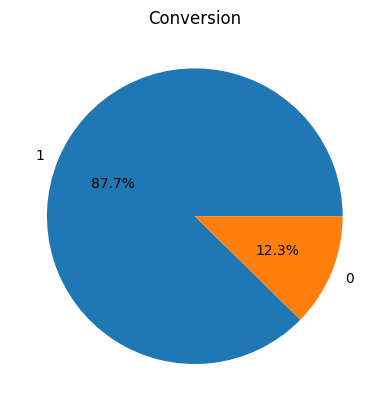

In [ ]:
#-- visualize the distribution of the data for conversion
y.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title("Conversion")
plt.show()

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the feature matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Logistic regression with scikit-learn
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_resampled)

print("Training set score: {:.3f}".format(log_reg.score(X_train, y_train_resampled)))
print("Test set score: {:.3f}".format(log_reg.score(X_test, y_test)))


Training set score: 0.934
Test set score: 0.889


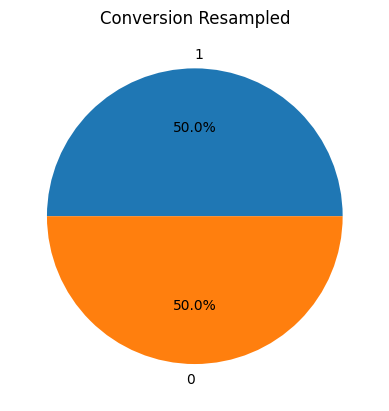

In [ ]:
#-- visualize the distribution of the resampled data for conversion
y_train_resampled.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title("Conversion Resampled")
plt.show()

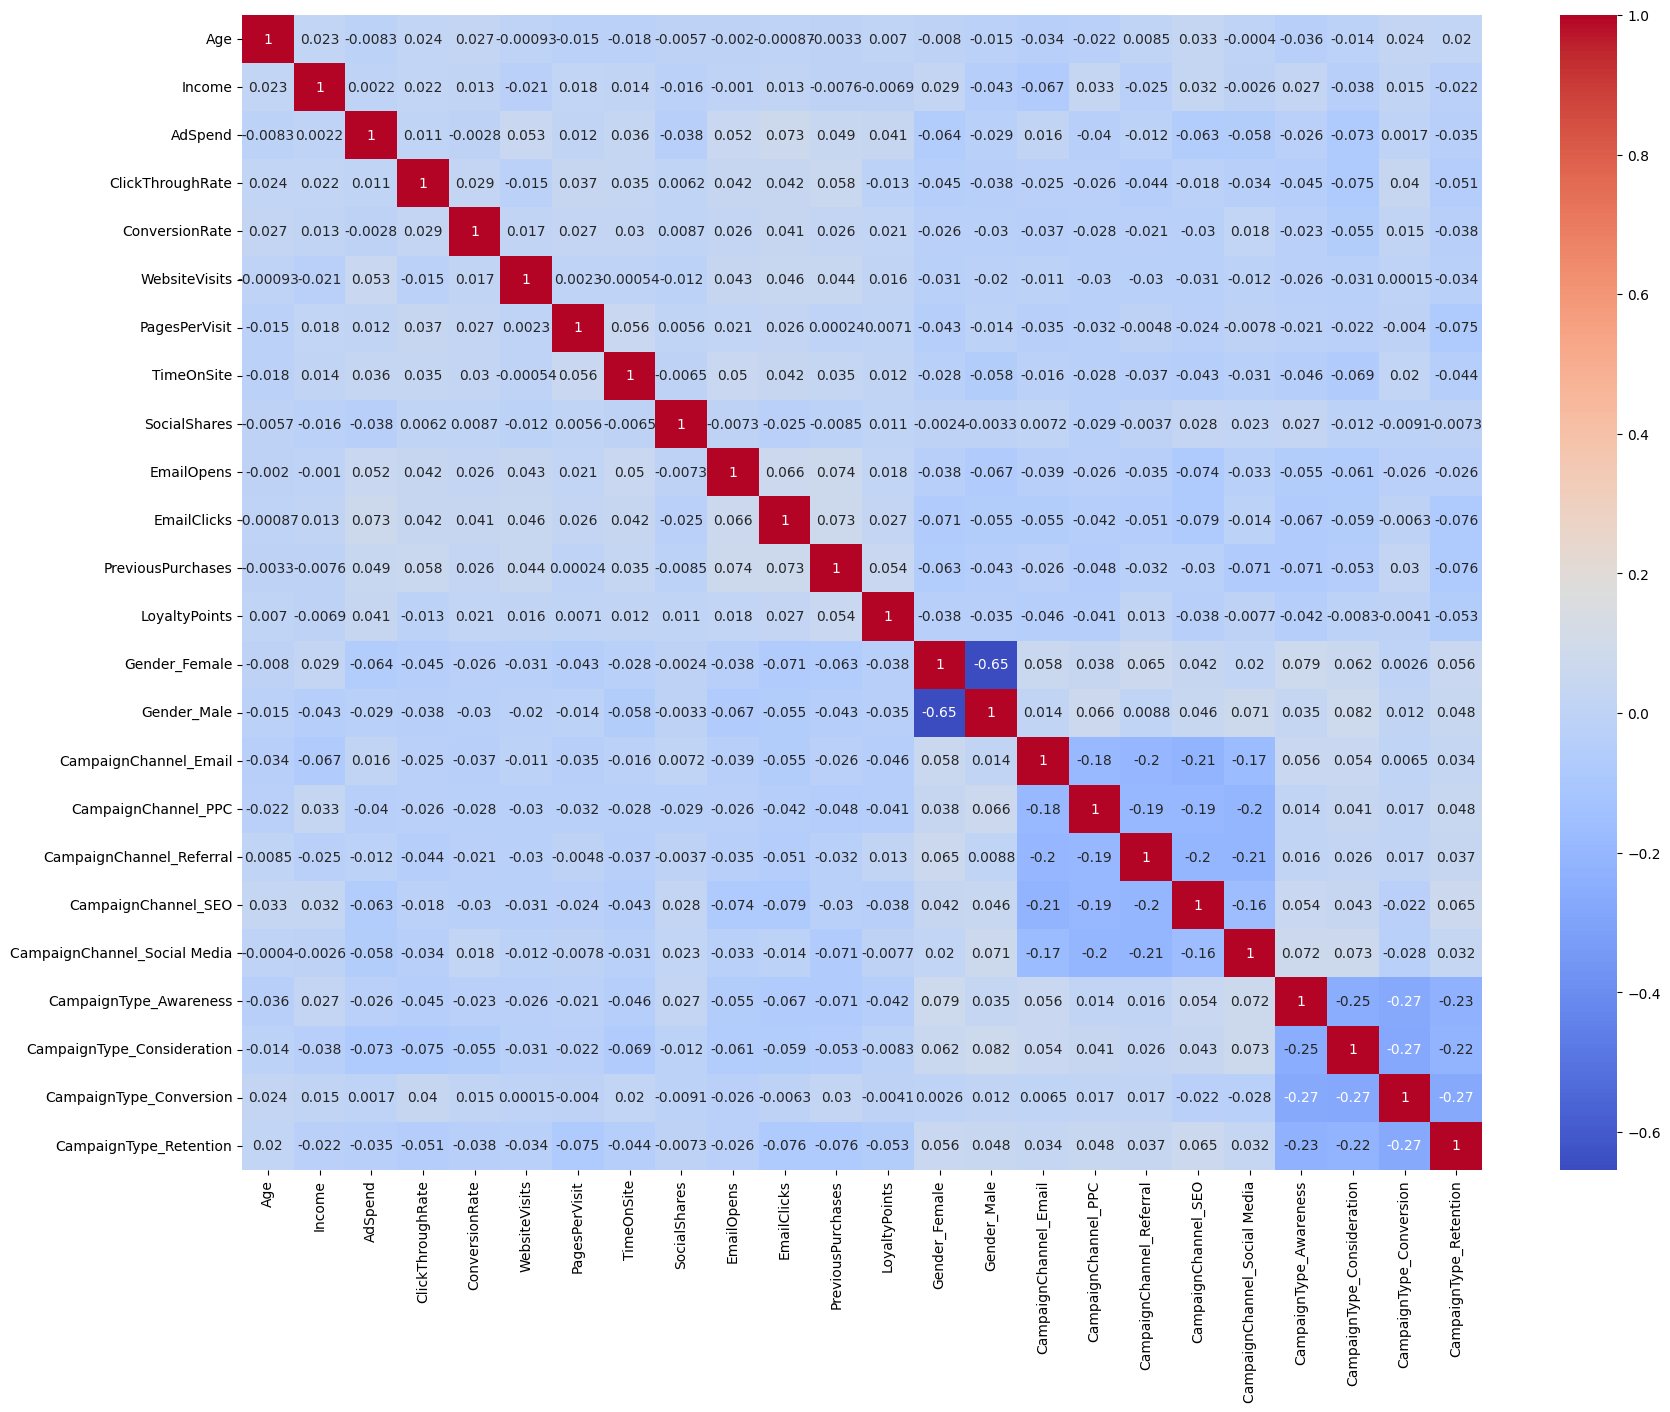

In [ ]:
# correlation of the dependent variables after resampling

plt.figure(figsize=(20,15))
corr = X_train_resampled.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Logisitc Regression

In [ ]:
# Logistic regression with statsmodels
# Add a constant for the intercept
X_trainSM = sm.add_constant(X_train)  # Add constant for intercept

# Fit logistic regression using statsmodels
logit_model = sm.Logit(y_train_resampled, X_trainSM)
result = logit_model.fit()
print(result.summary())


         Current function value: 0.182568
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             Conversion   No. Observations:                11212
Model:                          Logit   Df Residuals:                    11187
Method:                           MLE   Df Model:                           24
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.7366
Time:                        18:34:42   Log-Likelihood:                -2047.0
converged:                      False   LL-Null:                       -7771.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.2431   8.15e+05   -3.1e-05      1.000    -1.6e+06     1.6e+06
x1             0.0283      0.038      0.750      0.453      -0.04

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  47  147]
 [  31 1375]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.24      0.35       194
           1       0.90      0.98      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.75      0.61      0.64      1600
weighted avg       0.87      0.89      0.87      1600


Accuracy Score:
0.88875


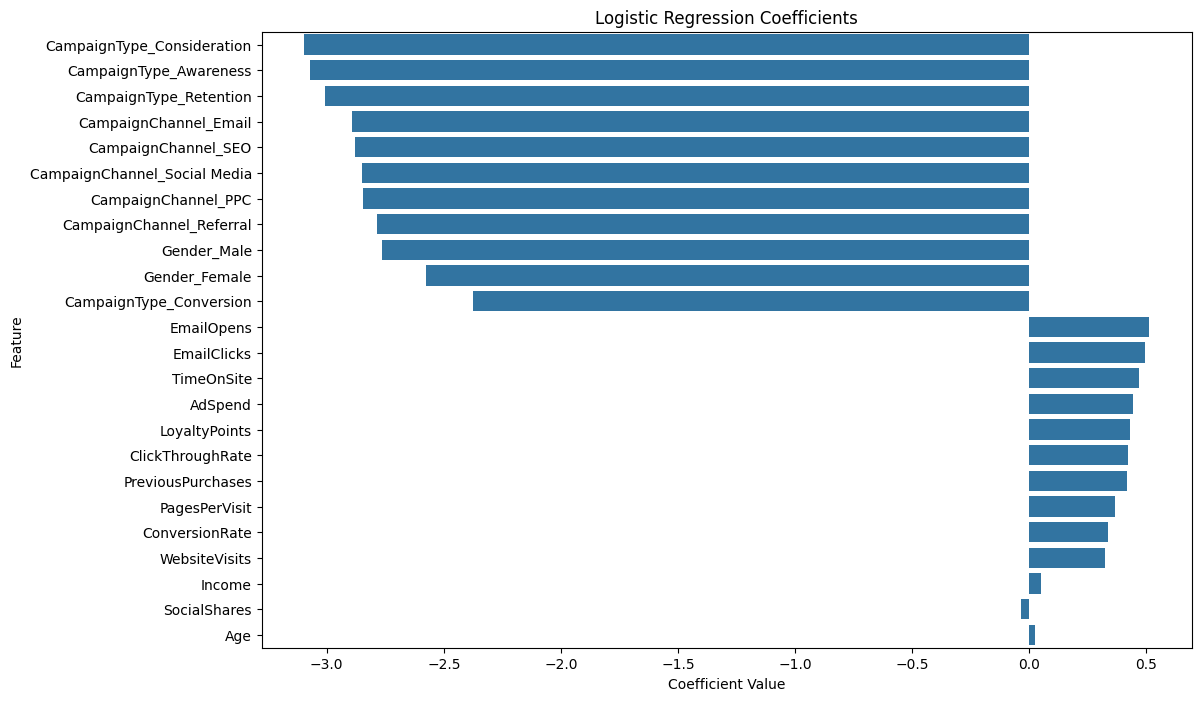

In [ ]:
#-- Visualize the coefficients of the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X_train_resampled.columns,  # Use data from the resampled set
    'Coefficient': log_reg.coef_[0]
})

# Sort by absolute value of coefficients
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(False)
plt.show()


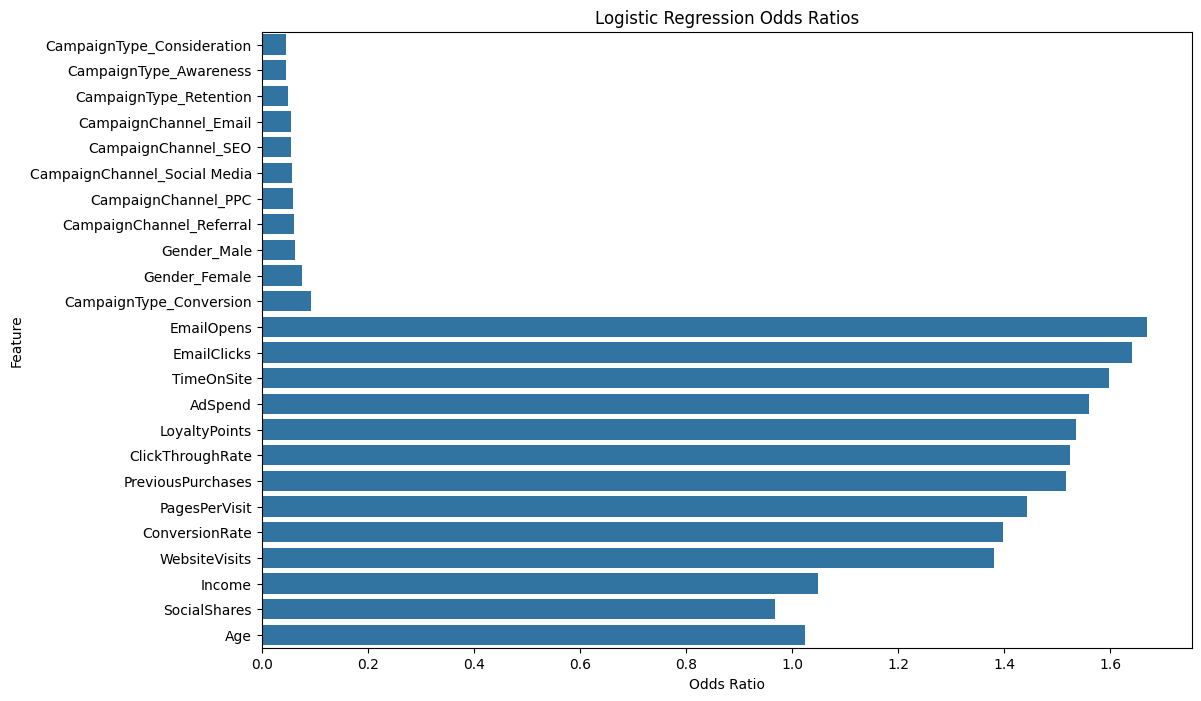

In [ ]:

# Calculate Odds Ratios by exponentiating the coefficients
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])

# Plot the odds ratios (optional)
plt.figure(figsize=(12, 8))
sns.barplot(x='Odds_Ratio', y='Feature', data=coefficients)
plt.title('Logistic Regression Odds Ratios')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.grid(False)
plt.show()
#-- the first 11 features are smaller than the rest because they are categorical
#-- variables that have a value of either 0 or 1

In [ ]:
# Display the sorted coefficients with odds ratios as a table
coefficients

Feature  Coefficient  Abs_Coefficient  Odds_Ratio
21    CampaignType_Consideration    -3.097521         3.097521    0.045161
20        CampaignType_Awareness    -3.073687         3.073687    0.046250
23        CampaignType_Retention    -3.006967         3.006967    0.049441
15         CampaignChannel_Email    -2.892701         2.892701    0.055426
18           CampaignChannel_SEO    -2.880279         2.880279    0.056119
19  CampaignChannel_Social Media    -2.847409         2.847409    0.057994
16           CampaignChannel_PPC    -2.844091         2.844091    0.058187
17      CampaignChannel_Referral    -2.785042         2.785042    0.061727
14                   Gender_Male    -2.766044         2.766044    0.062910
13                 Gender_Female    -2.576697         2.576697    0.076025
22       CampaignType_Conversion    -2.375543         2.375543    0.092964
9                     EmailOpens     0.512927         0.512927    1.670173
10                   EmailClicks     0.495940         0.495940    1.642042
7                     TimeOnSite     0.468630         0.468630    1.597804
2                        AdSpend     0.444209         0.444209    1.559257
12                 LoyaltyPoints     0.428373         0.428373    1.534758
3               ClickThroughRate     0.421094         0.421094    1.523628
11             PreviousPurchases     0.417023         0.417023    1.517437
6                  PagesPerVisit     0.366681         0.366681    1.442937
4                 ConversionRate     0.335188         0.335188    1.398204
5                  WebsiteVisits     0.322649         0.322649    1.380780
1                         Income     0.048307         0.048307    1.049492
8                   SocialShares    -0.033251         0.033251    0.967295
0                            Age     0.024956         0.024956    1.025270

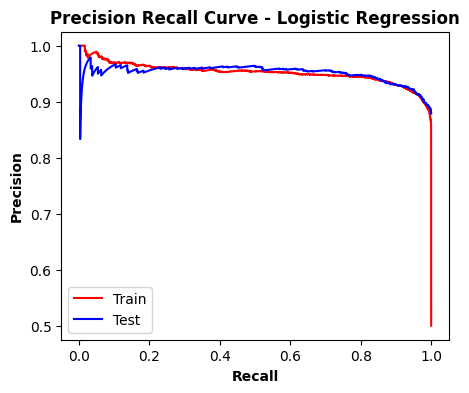

In [ ]:

# Initialize the Logistic Regression model
model2 = LogisticRegression()

# Fit the Logistic Regression model using the training data
# `X_train` contains the features, and `y_train_resampled` contains the resampled target variable
model2.fit(X_train, y_train_resampled)

# Make predictions on the training data
y_pred_train = model2.predict(X_train)

# Get predicted probabilities for the positive class on the training data
y_pred_prob_train = model2.predict_proba(X_train)[:, 1]

# Make predictions on the test data
y_pred_test = model2.predict(X_test)

# Get predicted probabilities for the positive class on the test data
y_pred_prob_test = model2.predict_proba(X_test)[:, 1]

# Calculate precision-recall values for the training data
# `precision_train` and `recall_train` store the precision and recall values, respectively
precision_train, recall_train, _ = precision_recall_curve(y_train_resampled, y_pred_prob_train)

# Calculate precision-recall values for the test data
# `precision_test` and `recall_test` store the precision and recall values, respectively
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_prob_test)

# Plot the Precision-Recall curve
plt.figure(figsize=(5, 4))  # Set the figure size
plt.plot(recall_train, precision_train, color='red', label='Train')  # Plot the curve for the training data
plt.plot(recall_test, precision_test, color='blue', label='Test')   # Plot the curve for the test data

# Add axis labels, title, and legend
plt.xlabel("Recall", fontsize=10, fontweight='bold', color='black')  # X-axis label
plt.ylabel("Precision", fontsize=10, fontweight='bold', color='black')  # Y-axis label
plt.title("Precision Recall Curve - Logistic Regression", fontsize=12, fontweight='bold')  # Plot title
plt.legend()  # Add legend to distinguish between training and test curves

# Display the plot
plt.show()

accuracy score: 0.88875


<Axes: >

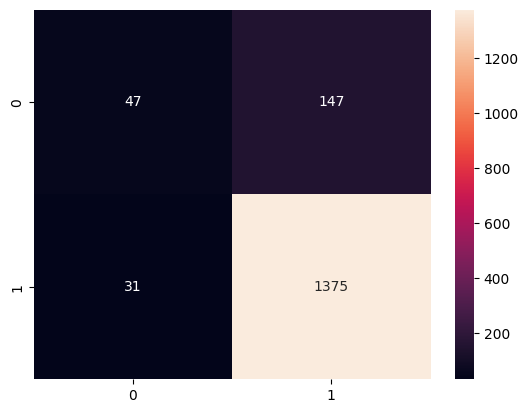

In [ ]:
# Initialize a Logistic Regression model
lr = LogisticRegression()

# Train the Logistic Regression model on the resampled training data
# `X_train` contains the feature set, and `y_train_resampled` is the resampled target variable
lr.fit(X_train, y_train_resampled)

# Use the trained model to make predictions on the test dataset
pred = lr.predict(X_test)

# Calculate and print the accuracy score of the model
# Accuracy score = (Number of correct predictions) / (Total predictions)
print("accuracy score:", accuracy_score(y_test, pred))

# Generate a confusion matrix
confusion_matrix(y_test, pred)

# Visualize the confusion matrix using a heatmap for better interpretation
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="0.0f")


In [ ]:
# Print a detailed classification report
# The classification report includes metrics like precision, recall, f1-score, and support for each class
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.60      0.24      0.35       194
           1       0.90      0.98      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.75      0.61      0.64      1600
weighted avg       0.87      0.89      0.87      1600



In [ ]:
# distribution of the data split for testing
print(len(y_train))
print(len(y_test))

6400
1600


In [ ]:
# conversion values in the training data
y_train.value_counts()

Conversion
1    5606
0     794
Name: count, dtype: int64

In [ ]:
# conversion values in the test data
y_test.value_counts()

Conversion
1    1406
0     194
Name: count, dtype: int64

In [ ]:
y_train_resampled.value_counts()

Conversion
1    5606
0    5606
Name: count, dtype: int64

### Decision Tree Classifier

In [ ]:
# decision tree classifier

# Initialize and train the decision tree model with no limit of nodes
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train_resampled)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  63  131]
 [ 189 1217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.32      0.28       194
           1       0.90      0.87      0.88      1406

    accuracy                           0.80      1600
   macro avg       0.58      0.60      0.58      1600
weighted avg       0.82      0.80      0.81      1600


Accuracy Score:
0.8


In [ ]:
X_train_resampled.columns

Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Gender_Female', 'Gender_Male', 'CampaignChannel_Email',
       'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Awareness', 'CampaignType_Consideration',
       'CampaignType_Conversion', 'CampaignType_Retention'],
      dtype='object')

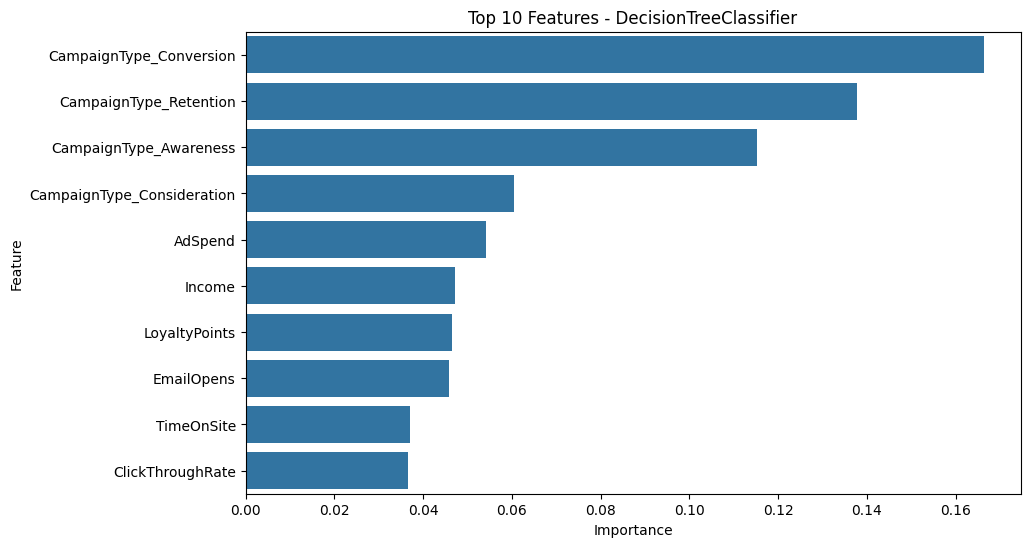

In [ ]:
# Save feature names before transforming X_train
feature_names = X_train_resampled.columns

# Train models that support feature importances
decision_tree = [("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42))]

# Iterate over models
for model_name, model in decision_tree:

    # Train model
    model.fit(X_train, y_train_resampled)

    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_

    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10])
    plt.title(f"Top 10 Features - DecisionTreeClassifier")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

In [ ]:
feature_importances_df

Feature  Importance
22       CampaignType_Conversion    0.166293
23        CampaignType_Retention    0.137848
20        CampaignType_Awareness    0.115189
21    CampaignType_Consideration    0.060383
2                        AdSpend    0.054125
1                         Income    0.047276
12                 LoyaltyPoints    0.046506
9                     EmailOpens    0.045955
7                     TimeOnSite    0.037157
3               ClickThroughRate    0.036697
6                  PagesPerVisit    0.036420
10                   EmailClicks    0.028940
11             PreviousPurchases    0.028830
4                 ConversionRate    0.028555
5                  WebsiteVisits    0.027007
8                   SocialShares    0.016645
0                            Age    0.015408
16           CampaignChannel_PPC    0.014895
13                 Gender_Female    0.013603
18           CampaignChannel_SEO    0.011759
19  CampaignChannel_Social Media    0.011394
15         CampaignChannel_Email    0.009144
17      CampaignChannel_Referral    0.006140
14                   Gender_Male    0.003832

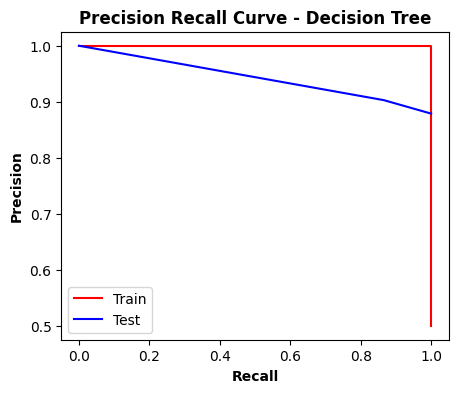

In [ ]:

# Initialize the Decision Tree Classifier with a random seed for reproducibility
model1 = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree Classifier using the training data
# `X_train` contains the feature set, and `y_train_resampled` is the resampled target variable
model1.fit(X_train, y_train_resampled)

# Make predictions on the training data
y_pred_train1 = model1.predict(X_train)

# Get predicted probabilities for the positive class on the training data
y_pred_prob_train1 = model1.predict_proba(X_train)[:, 1]

# Make predictions on the test data
y_pred_test1 = model1.predict(X_test)

# Get predicted probabilities for the positive class on the test data
y_pred_prob_test1 = model1.predict_proba(X_test)[:, 1]

# Calculate precision-recall values for the training data
# `precision_train1` and `recall_train1` store the precision and recall values, respectively
precision_train1, recall_train1, _ = precision_recall_curve(y_train_resampled, y_pred_prob_train1)

# Calculate precision-recall values for the test data
# `precision_test1` and `recall_test1` store the precision and recall values, respectively
precision_test1, recall_test1, _ = precision_recall_curve(y_test, y_pred_prob_test1)

# Plot the Precision-Recall curve
plt.figure(figsize=(5, 4))  # Set the figure size
plt.plot(recall_train1, precision_train1, color='red', label='Train')  # Plot the curve for training data
plt.plot(recall_test1, precision_test1, color='blue', label='Test')   # Plot the curve for test data

# Add axis labels, title, and legend
plt.xlabel("Recall", fontsize=10, fontweight='bold', color='black')  # X-axis label
plt.ylabel("Precision", fontsize=10, fontweight='bold', color='black')  # Y-axis label
plt.title("Precision Recall Curve - Decision Tree", fontsize=12, fontweight='bold')  # Plot title
plt.legend()  # Add legend to differentiate between training and test curves

# Display the plot
plt.show()


Model 1: LogisticRegression
Training Accuracy: 0.9339992864787727
Testing Accuracy: 0.88875


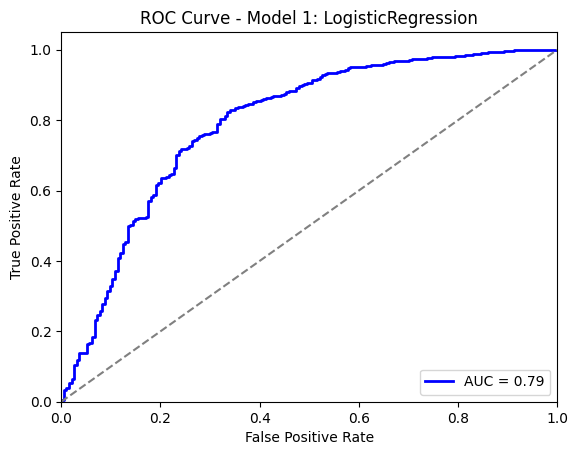

Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.8


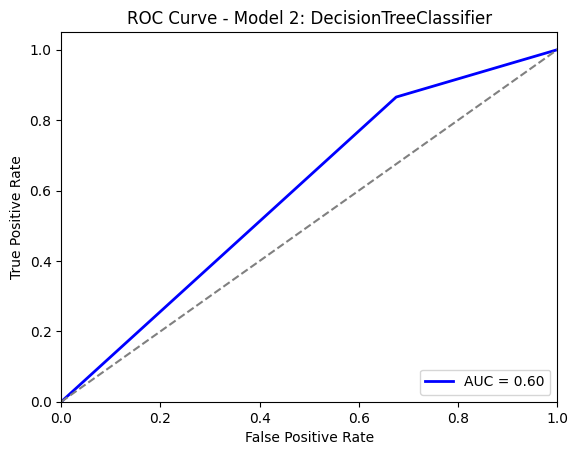

In [ ]:
# Models to be evaluated
models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42)

    ]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate positive class probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()